In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from importlib import reload

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import networkx as nx
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
final_cols=['compactness_worst','compactness_mean','compactness_se','concavity_se','concavity_worst',
            'fractal_dimension_worst','radius_se','smoothness_se','symmetry_worst','concave points_mean',
            'smoothness_mean','smoothness_worst','symmetry_mean','fractal_dimension_mean','radius_mean',
            'radius_worst','symmetry_se','texture_se']

In [4]:
sys.path.insert(0,'../modules')

In [5]:
import read_data

In [6]:
reload(read_data)

<module 'read_data' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\causal_impact\\modules\\read_data.py'>

In [69]:
data=read_data.read_data('../Data/data.csv')

In [70]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
data=data[final_cols+['diagnosis']]

In [72]:
data.head()

,compactness_worst,compactness_mean,compactness_se,concavity_se,concavity_worst,fractal_dimension_worst,radius_se,smoothness_se,symmetry_worst,concave points_mean,smoothness_mean,smoothness_worst,symmetry_mean,fractal_dimension_mean,radius_mean,radius_worst,symmetry_se,texture_se,diagnosis
0,0.6656,0.27760,0.04904,0.05373,0.7119,0.11890,1.0950,0.006399,0.4601,0.14710,0.11840,0.1622,0.2419,0.07871,17.99,25.38,0.03003,0.9053,1
1,0.1866,0.07864,0.01308,0.01860,0.2416,0.08902,0.5435,0.005225,0.2750,0.07017,0.08474,0.1238,0.1812,0.05667,20.57,24.99,0.01389,0.7339,1
2,0.4245,0.15990,0.04006,0.03832,0.4504,0.08758,0.7456,0.006150,0.3613,0.12790,0.10960,0.1444,0.2069,0.05999,19.69,23.57,0.02250,0.7869,1
3,0.8663,0.28390,0.07458,0.05661,0.6869,0.17300,0.4956,0.009110,0.6638,0.10520,0.14250,0.2098,0.2597,0.09744,11.42,14.91,0.05963,1.1560,1
4,0.2050,0.13280,0.02461,0.05688,0.4000,0.07678,0.7572,0.011490,0.2364,0.10430,0.10030,0.1374,0.1809,0.05883,20.29,22.54,0.01756,0.7813,1


In [73]:
x=data[final_cols]
y=data[['diagnosis']]

**Train and Test data split**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

**Data Scaling**

In [13]:
scaler = MinMaxScaler()

In [14]:
def scale_data(x_train, x_test, y_train, y_test):
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
    data_scaled=x_train.join(y_train)
    #Drop the nan diadnosis data because they belong to test data during train,test split
    data_scaled_train=data_scaled.dropna(subset=['diagnosis'])
    return data_scaled,data_scaled_train

In [15]:
_,data_scaled=scale_data(x_train, x_test, y_train, y_test)

In [16]:
data_scaled.isna().sum()

compactness_worst          0
compactness_mean           0
compactness_se             0
concavity_se               0
concavity_worst            0
fractal_dimension_worst    0
radius_se                  0
smoothness_se              0
symmetry_worst             0
concave points_mean        0
smoothness_mean            0
smoothness_worst           0
symmetry_mean              0
fractal_dimension_mean     0
radius_mean                0
radius_worst               0
symmetry_se                0
texture_se                 0
diagnosis                  0
dtype: int64

### Causal Networks for Train Data

In [17]:
sm_org=from_pandas(data_scaled)

In [18]:
# If failed to import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [19]:
def draw_structmodel(sm,layout='fdp',label=""):
    viz = plot_structure(sm,
                         graph_attributes={"scale": "0.5","ratio":"fill","size":"8,8","label":label},
                         all_node_attributes=NODE_STYLE.WEAK,
                         all_edge_attributes=EDGE_STYLE.WEAK,
                         prog=layout,
                         )
    return Image(viz.draw(format='png'))

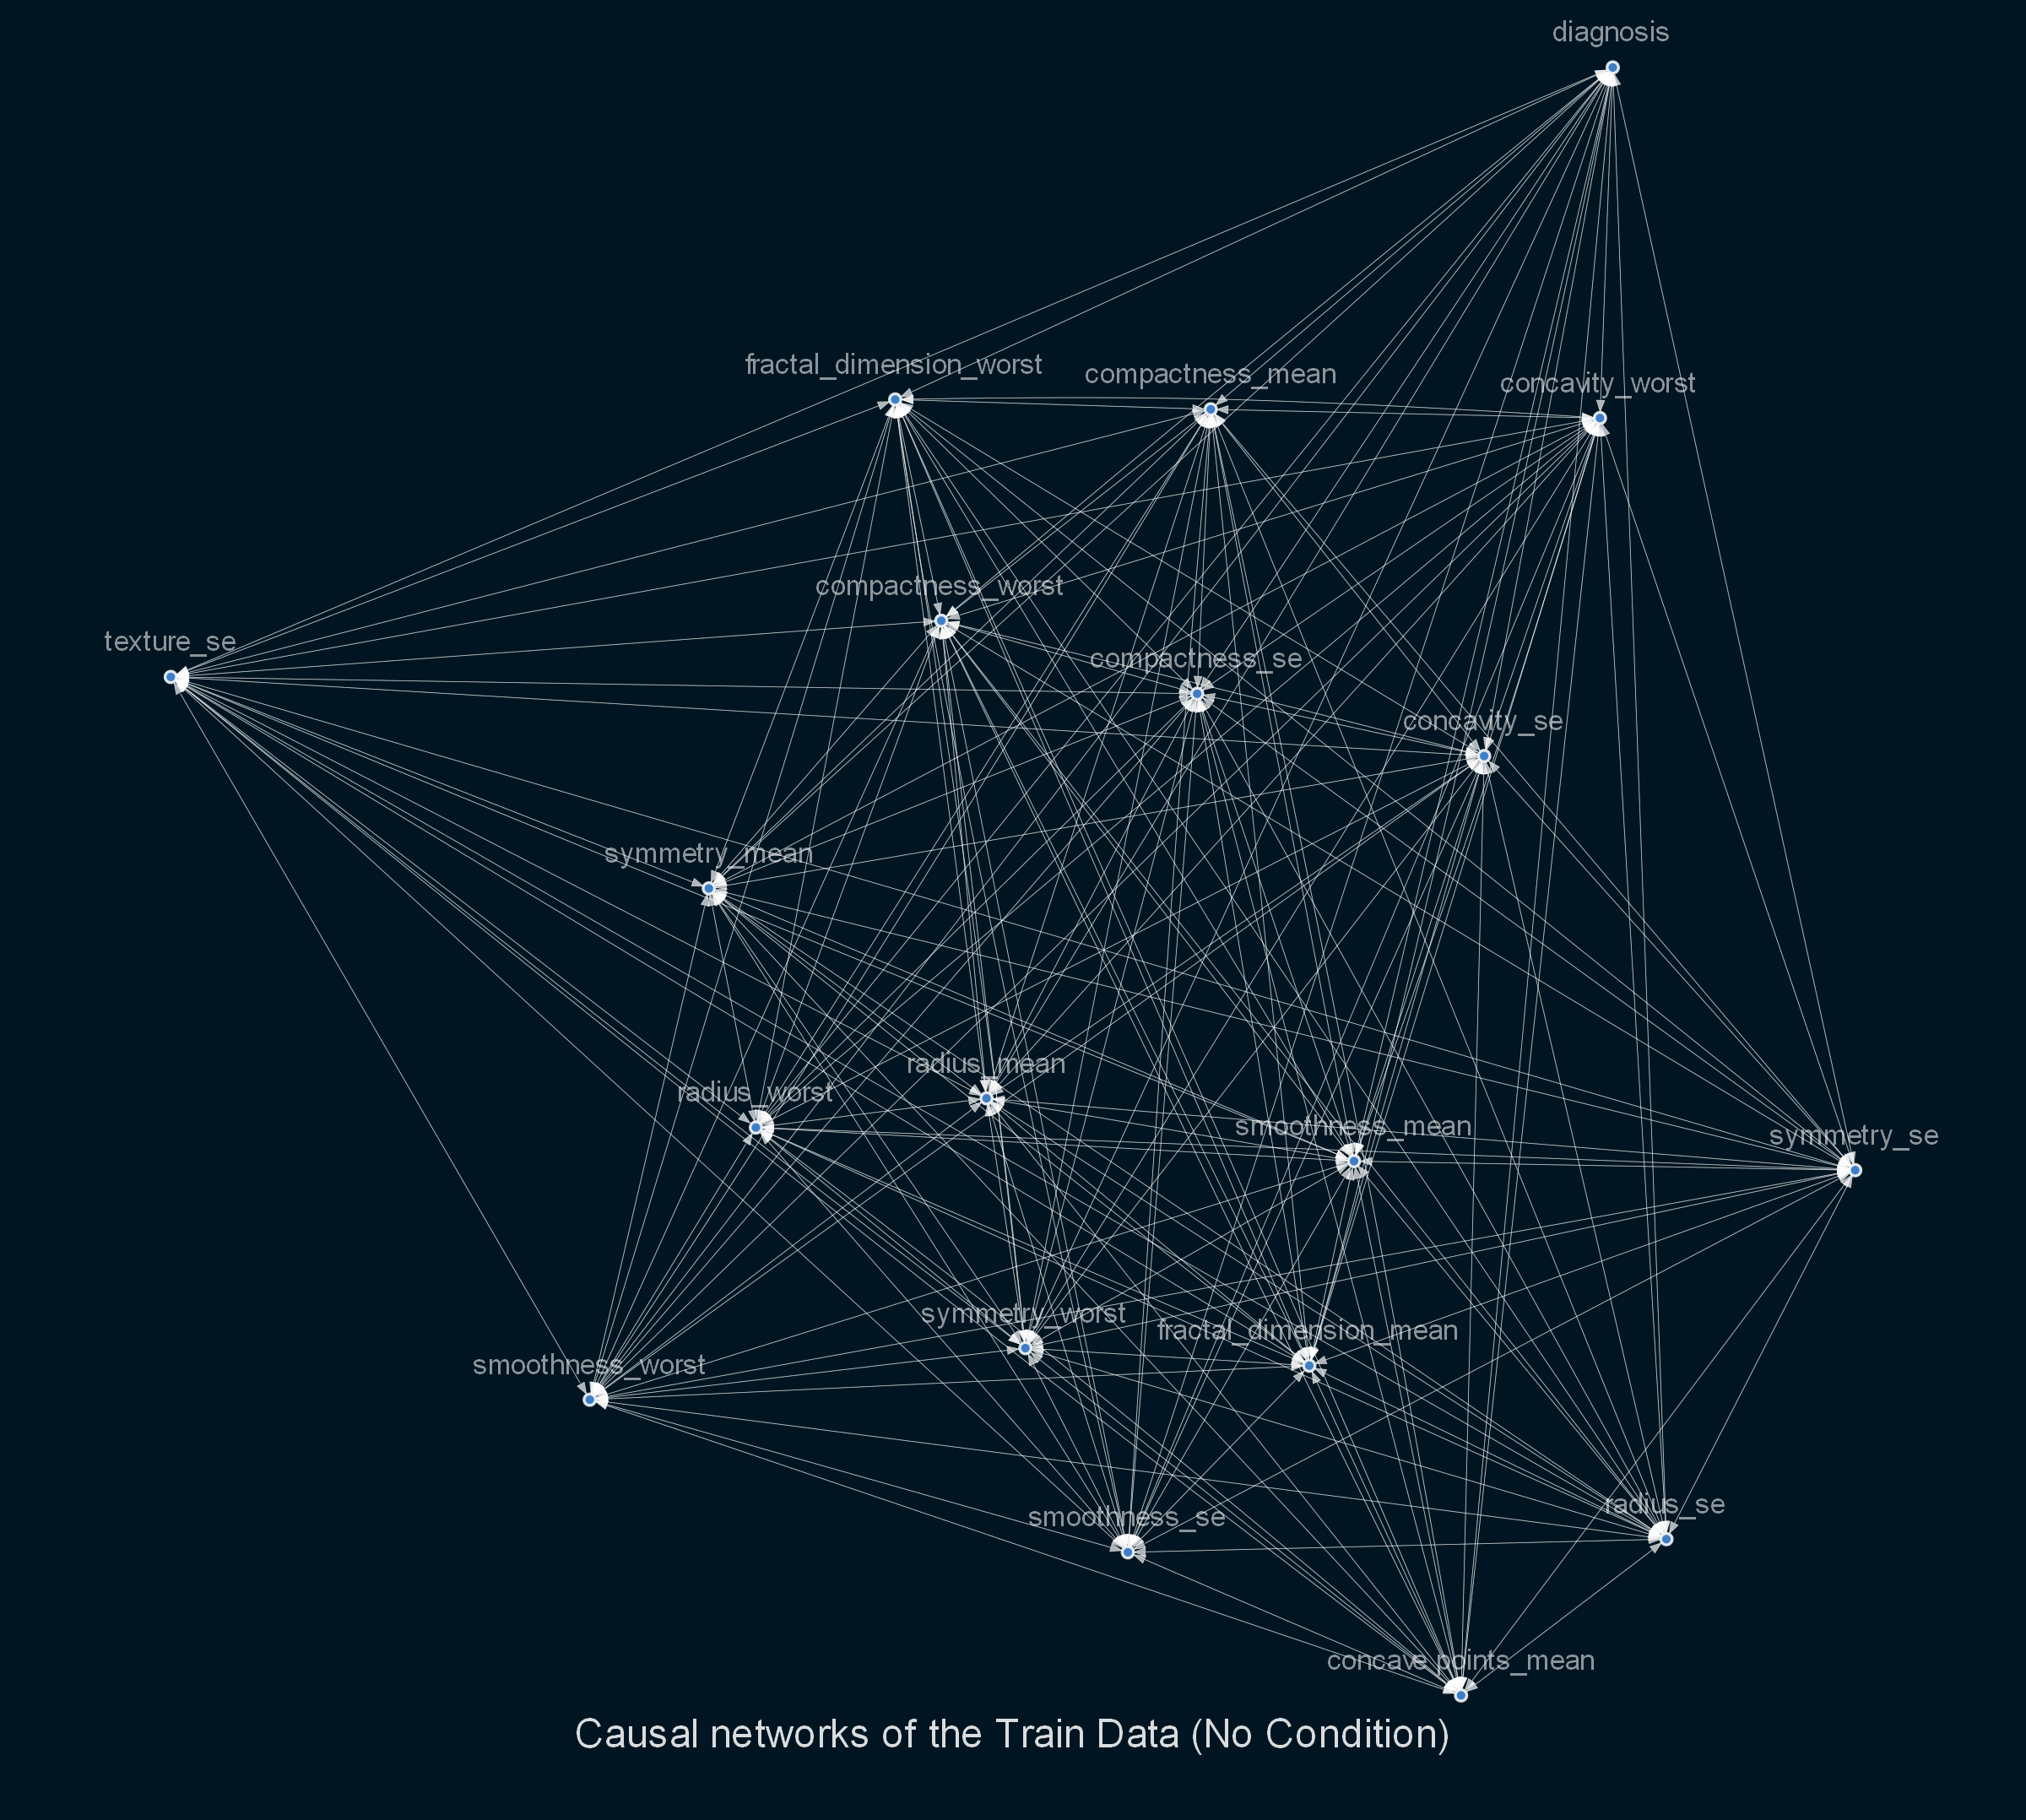

In [20]:
draw_structmodel(sm_org,label="Causal networks of the Train Data (No Condition)")

The reason why we have a fully connected graph here is we haven’t applied thresholding to the weaker edges. Thresholding can be applied either by specifying the value for the parameter w_threshold in from_pandas, or we can remove the edges by calling the structure model function, remove_edges_below_threshold.

Now let's remove edges below 0.8

In [21]:
sm_org.remove_edges_below_threshold(0.8)

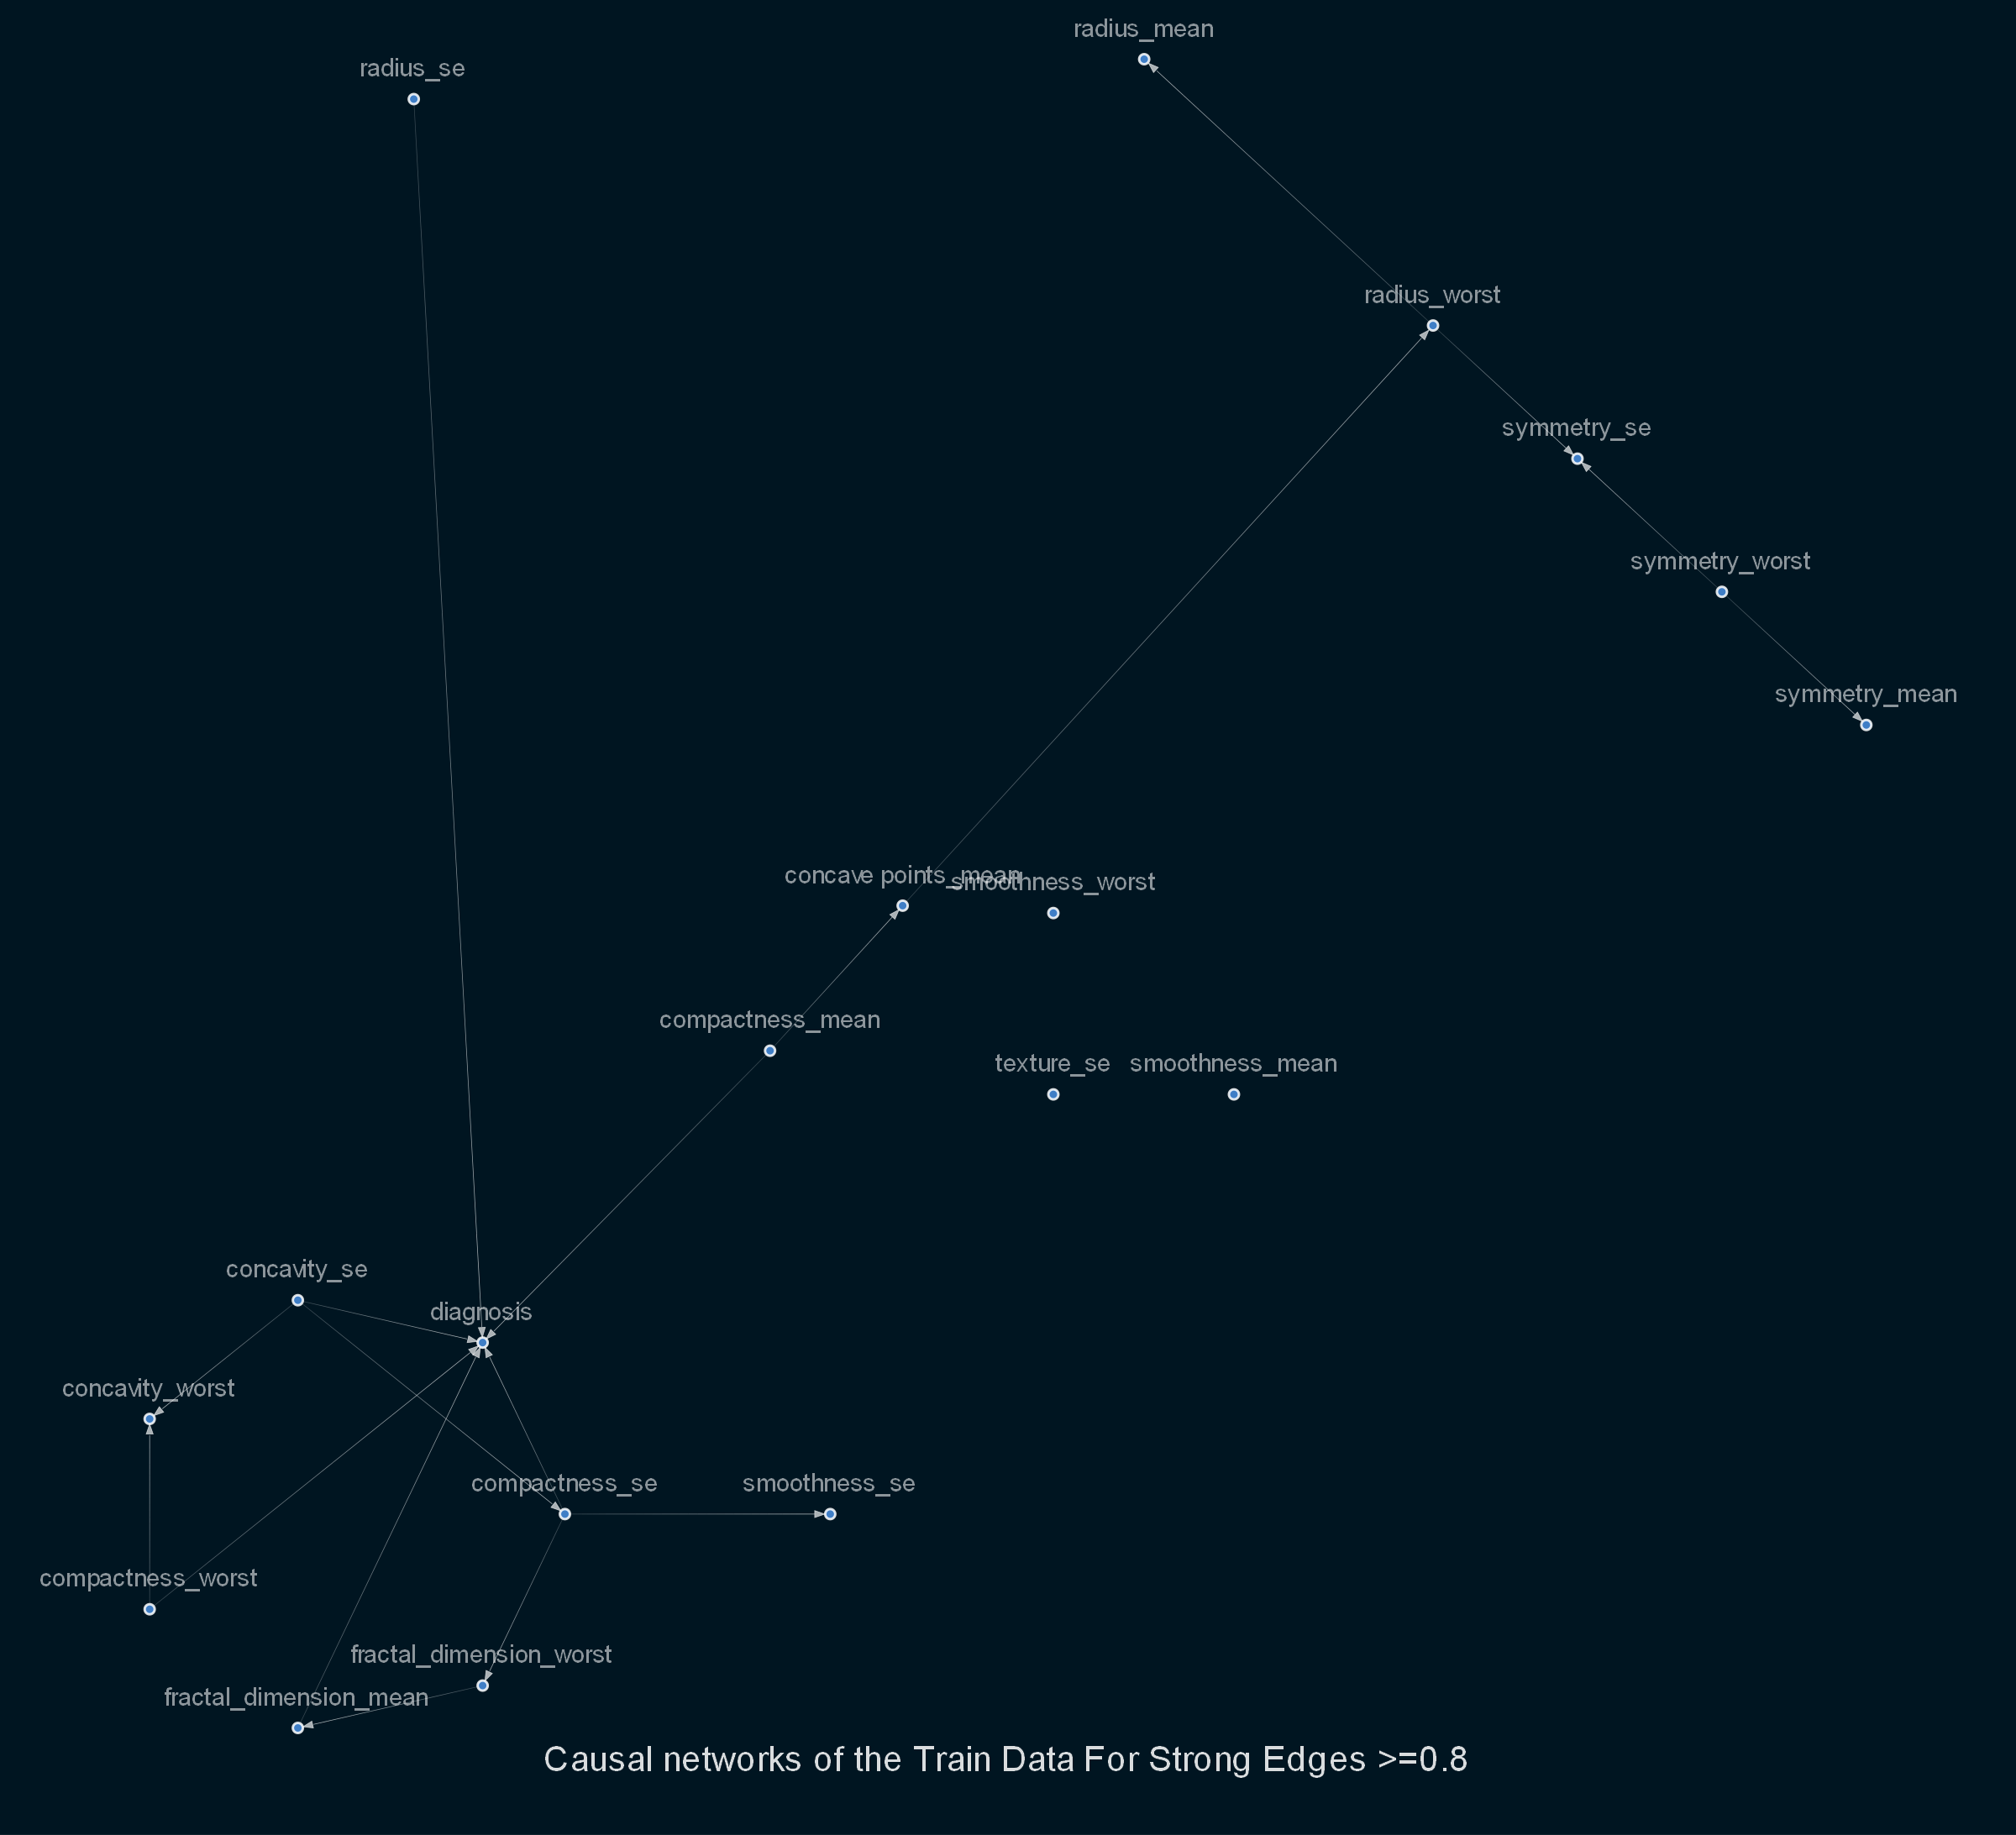

In [22]:
draw_structmodel(sm_org,'circo',label="Causal networks of the Train Data For Strong Edges >=0.8")

### causal graphs using increasing fractions of the data and compare with the ground truth(All Training Data)

In [23]:
def find_jaccard_index(sm_ground,sm_new,data_fraction):
    sm_ground=sm_ground.edges
    sm_new=sm_new.edges
    ja_idx=len(set(sm_ground)&set(sm_new))/len(set.union(set(sm_ground),set(sm_new)))
    print("Jaccard index for ground truth and {} of the data is {}".format(data_fraction,ja_idx))

**50% of the Data**

In [24]:
data_50=data_scaled.sample(frac=.5,random_state=42)
sm_50=from_pandas(data_50)
sm_50.remove_edges_below_threshold(0.8)
sm_50=sm_50.get_largest_subgraph()

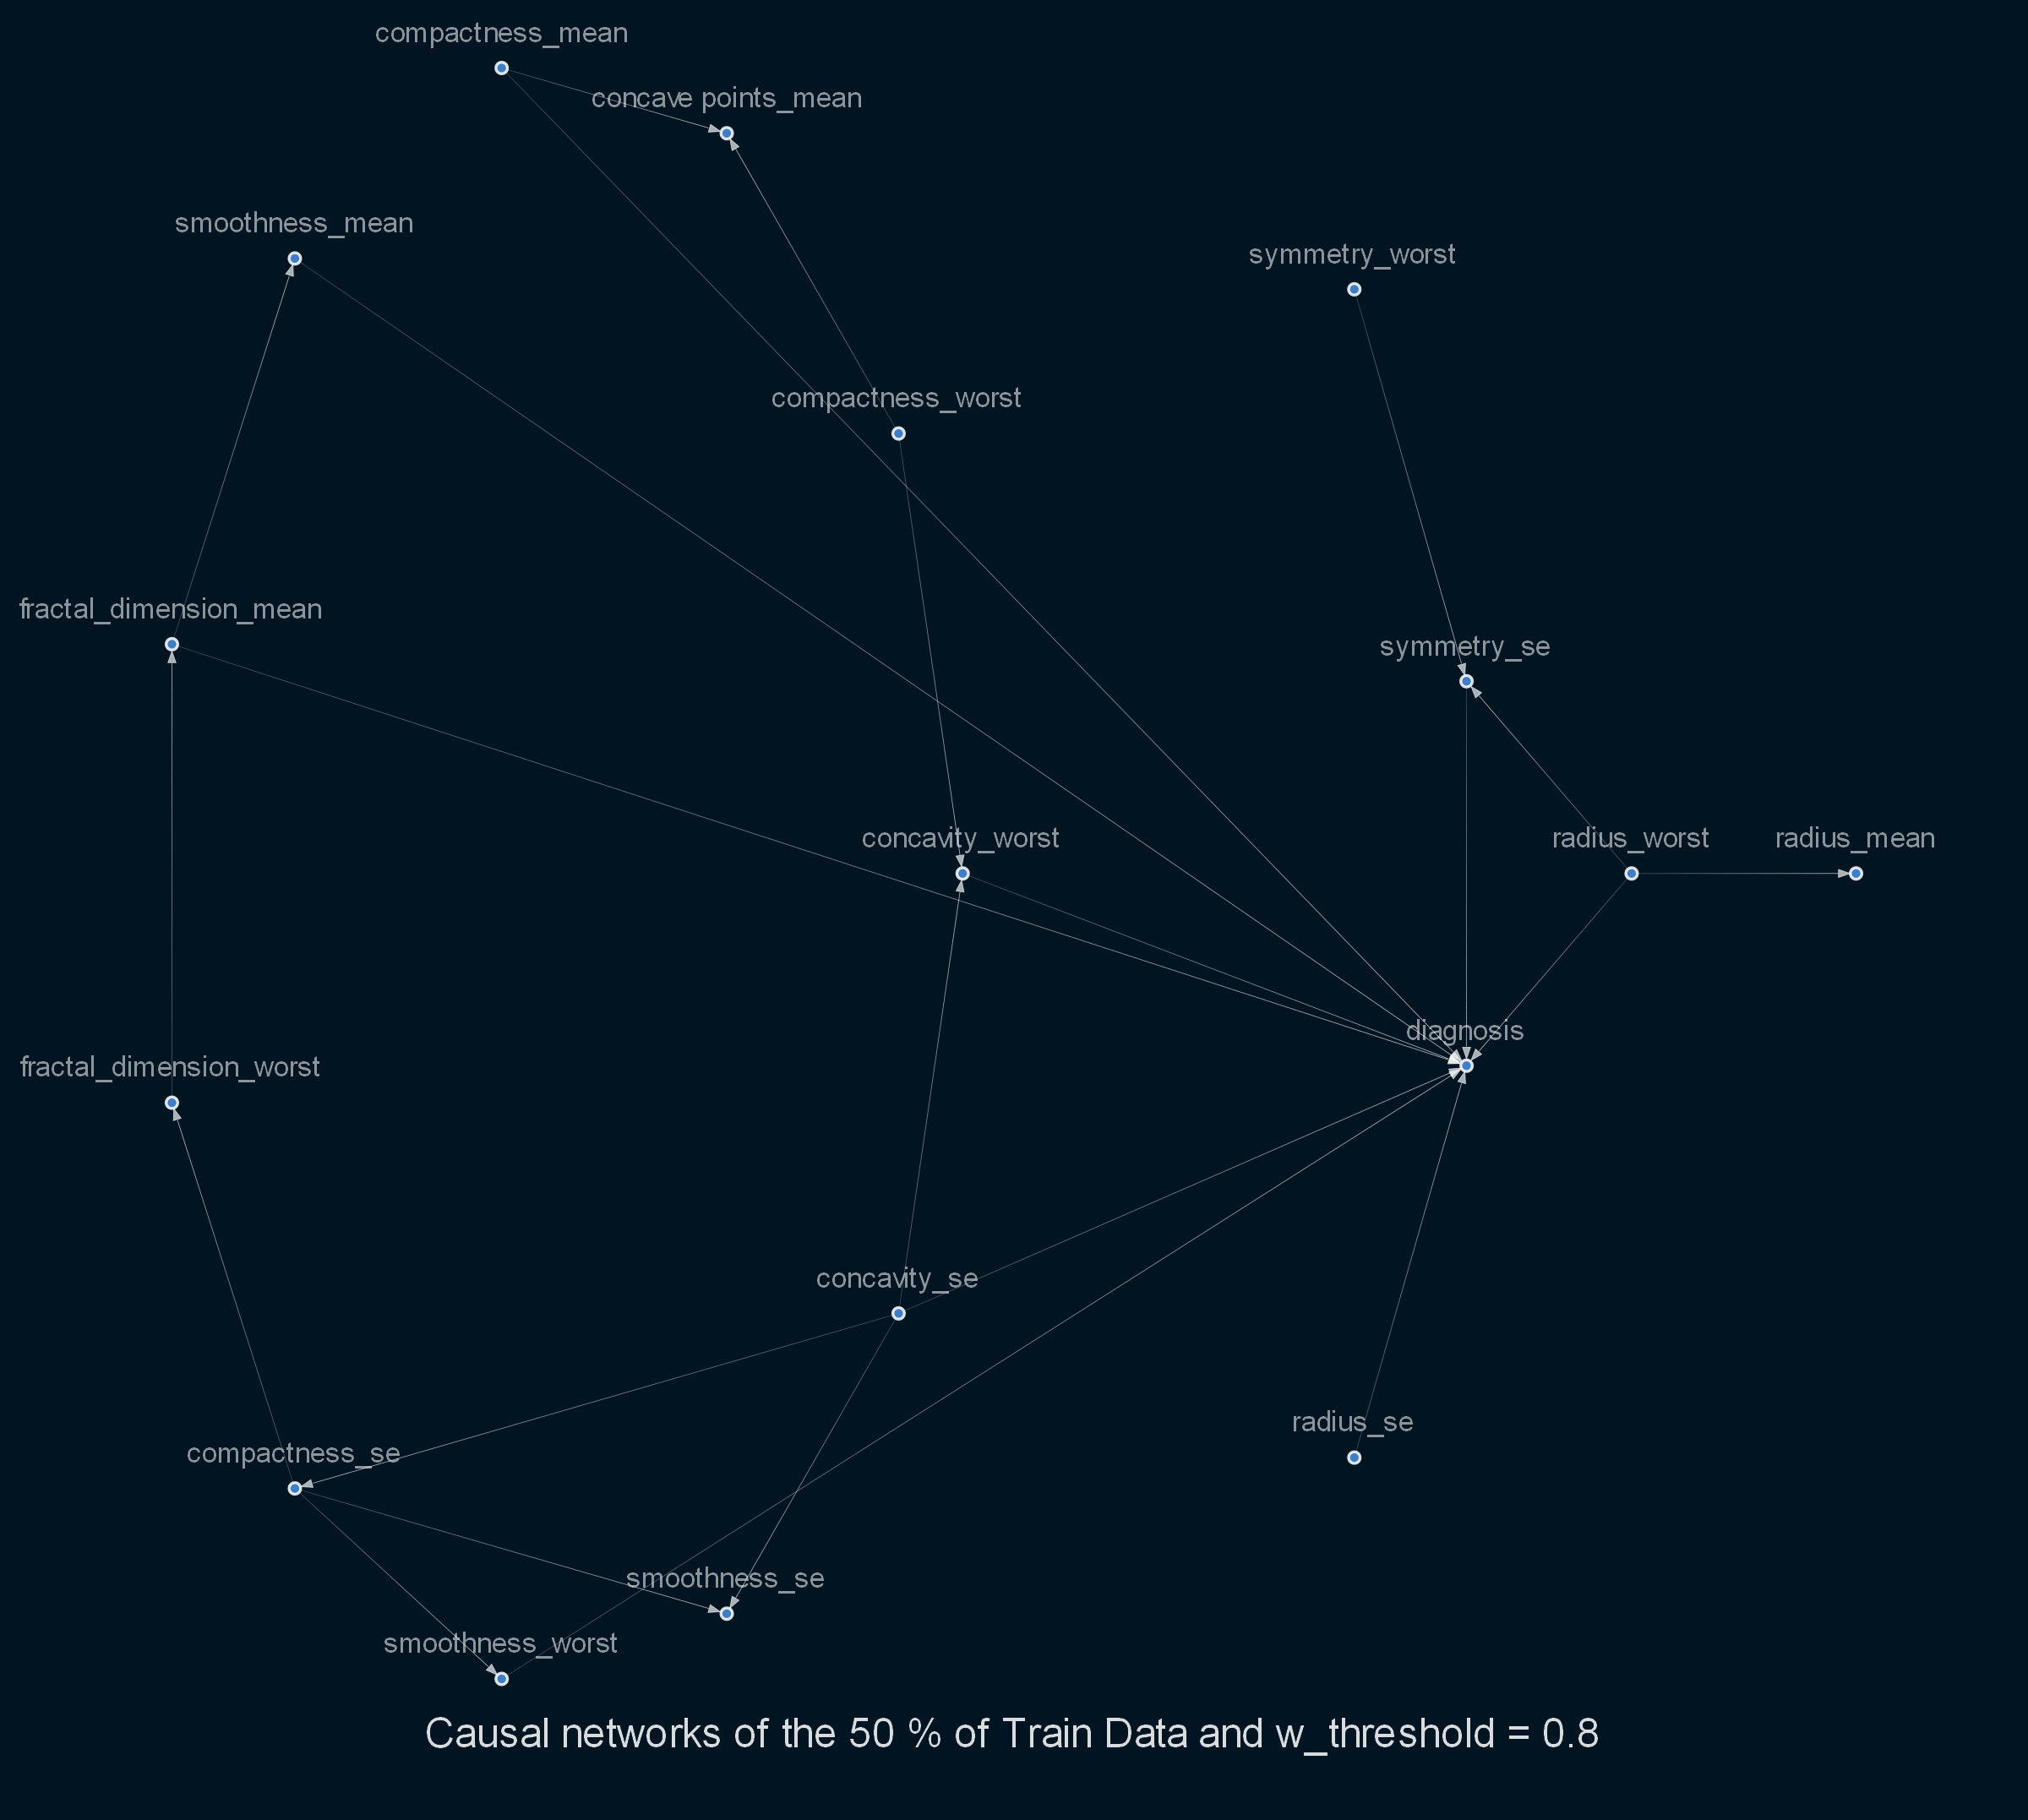

In [25]:
draw_structmodel(sm_50,'circo',label="Causal networks of the 50 % of Train Data and w_threshold = 0.8")

In [26]:
find_jaccard_index(sm_org,sm_50,"50%")

Jaccard index for ground truth and 50% of the data is 0.5185185185185185


#### 60% of the Data

In [27]:
data_60=data_scaled.sample(frac=.6,random_state=42)
sm_60=from_pandas(data_60)
sm_60.remove_edges_below_threshold(0.8)
sm_60=sm_60.get_largest_subgraph()

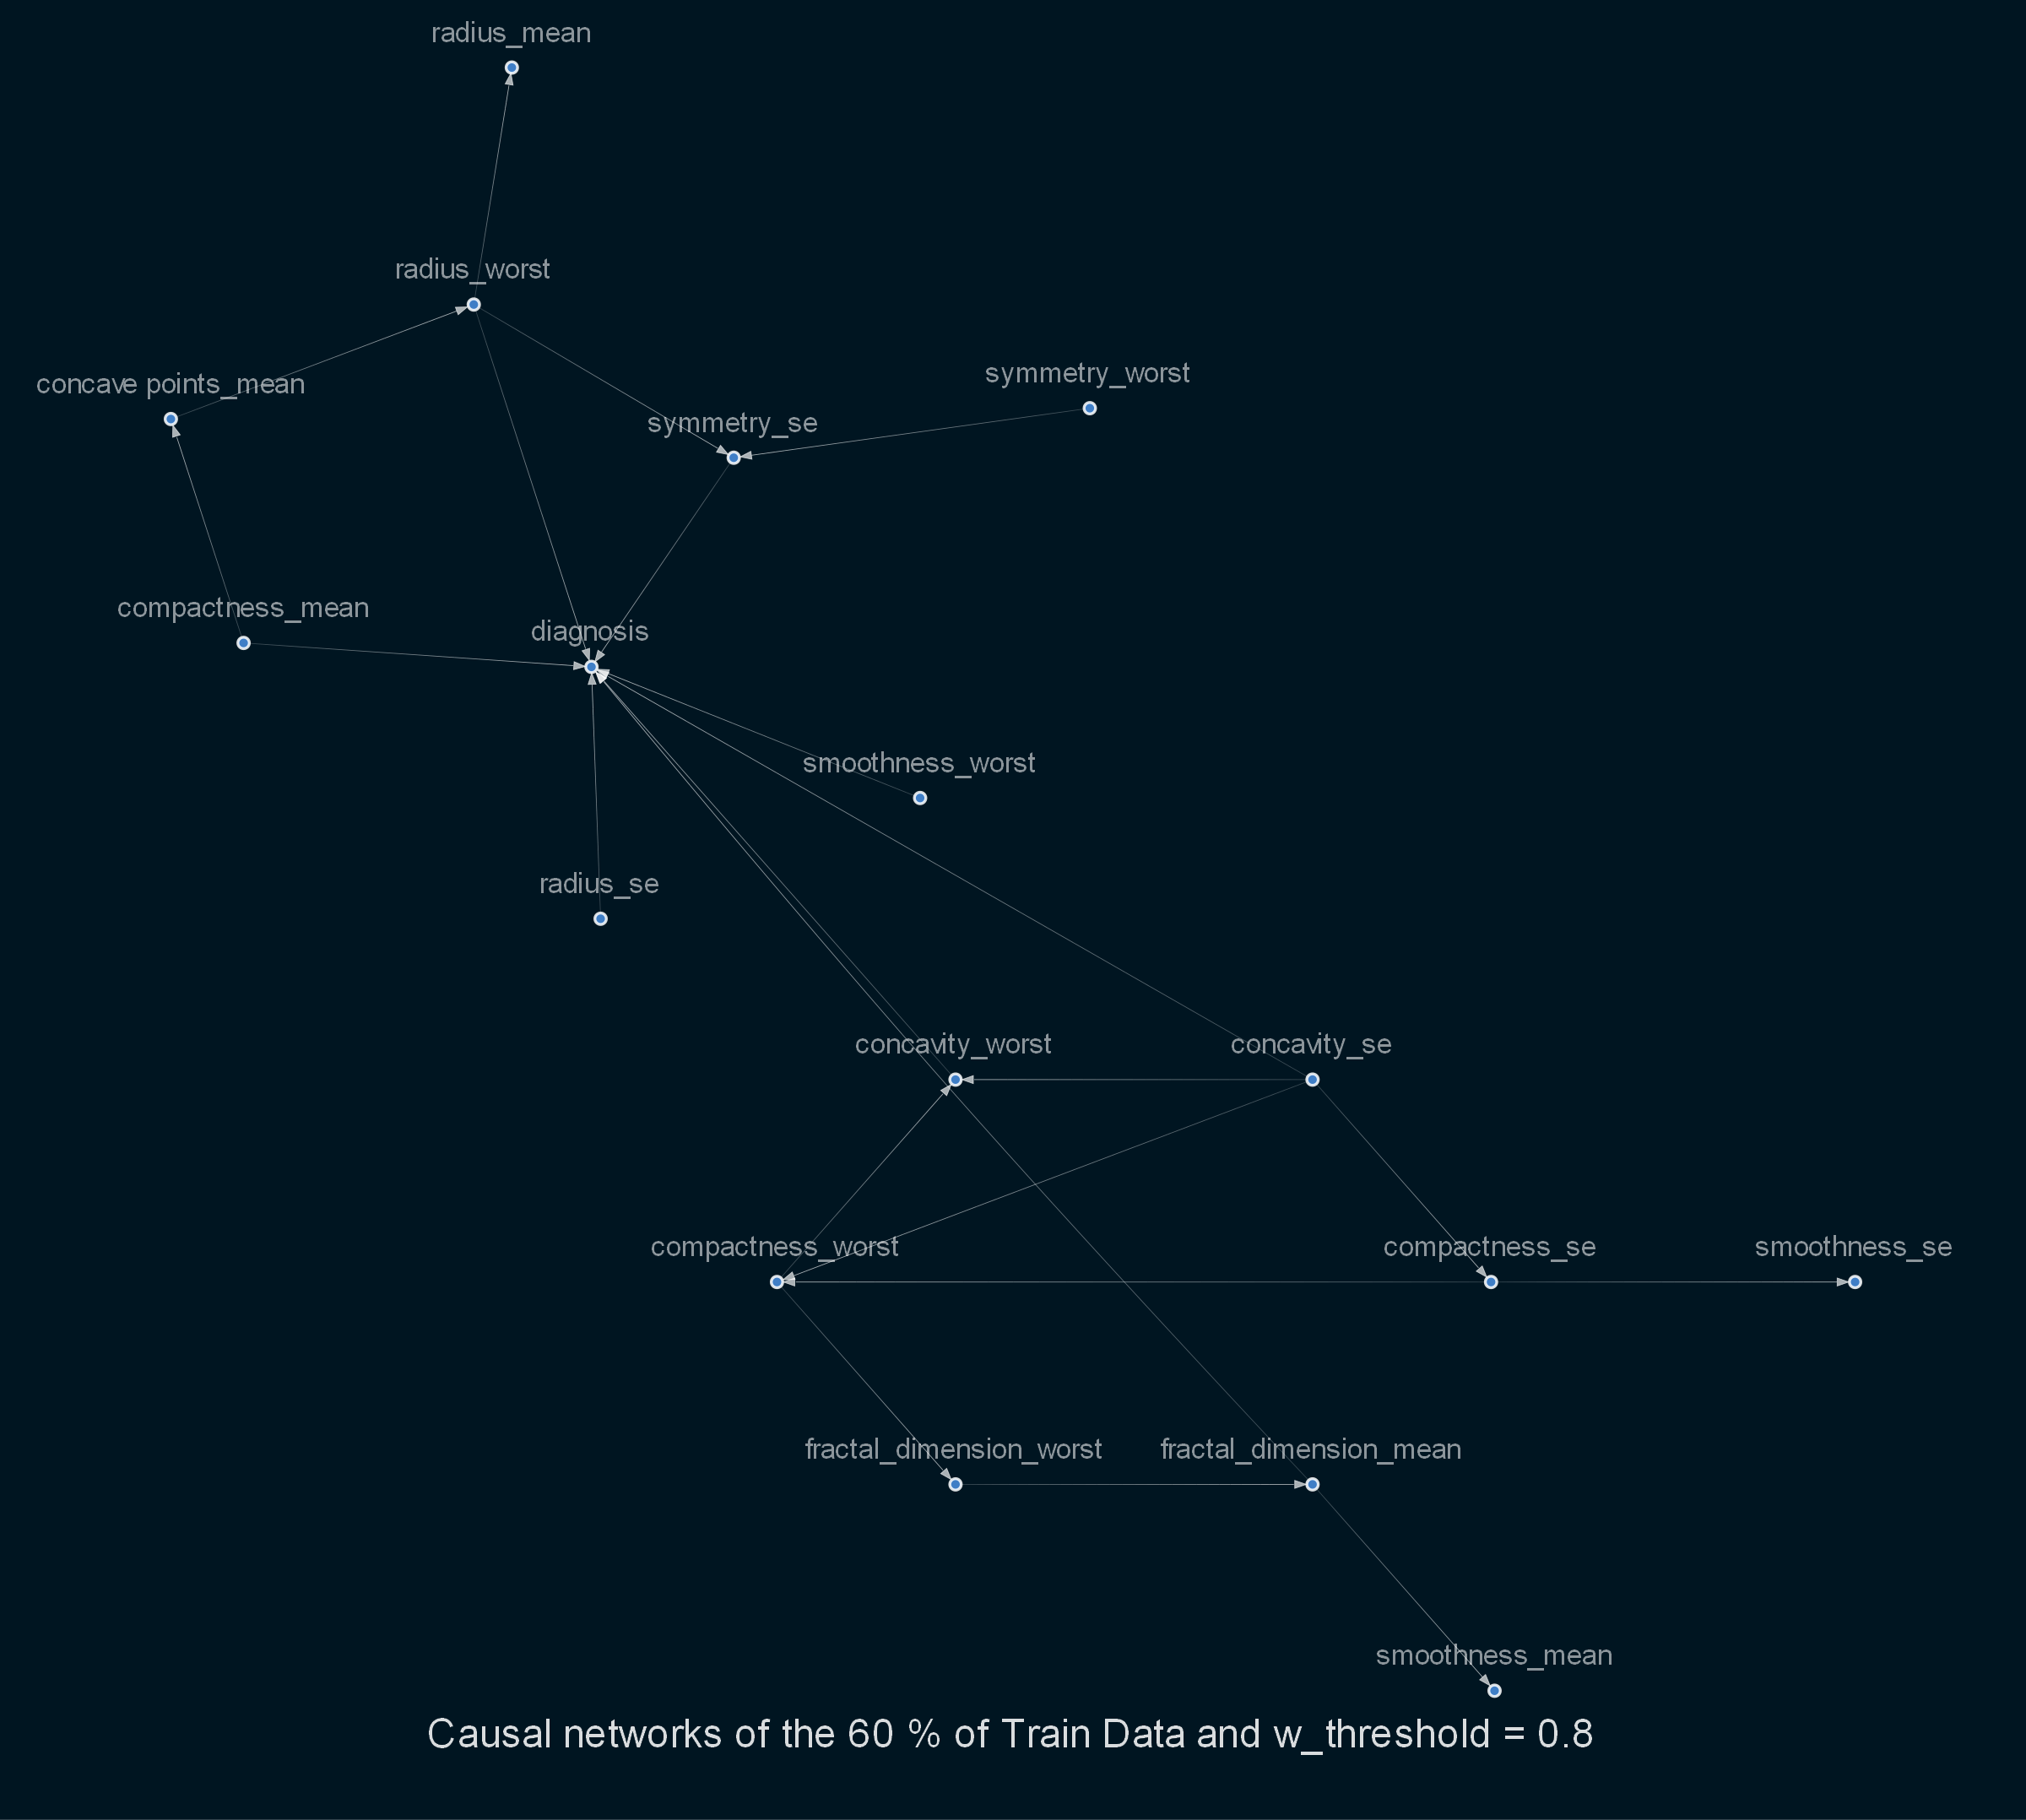

In [28]:
draw_structmodel(sm_60,'circo',label="Causal networks of the 60 % of Train Data and w_threshold = 0.8")

In [29]:
find_jaccard_index(sm_org,sm_60,"60%")

Jaccard index for ground truth and 60% of the data is 0.5384615384615384


#### 70% of the Data

In [30]:
data_70=data_scaled.sample(frac=.7,random_state=42)
sm_70=from_pandas(data_70)
sm_70.remove_edges_below_threshold(0.8)
sm_70=sm_70.get_largest_subgraph()

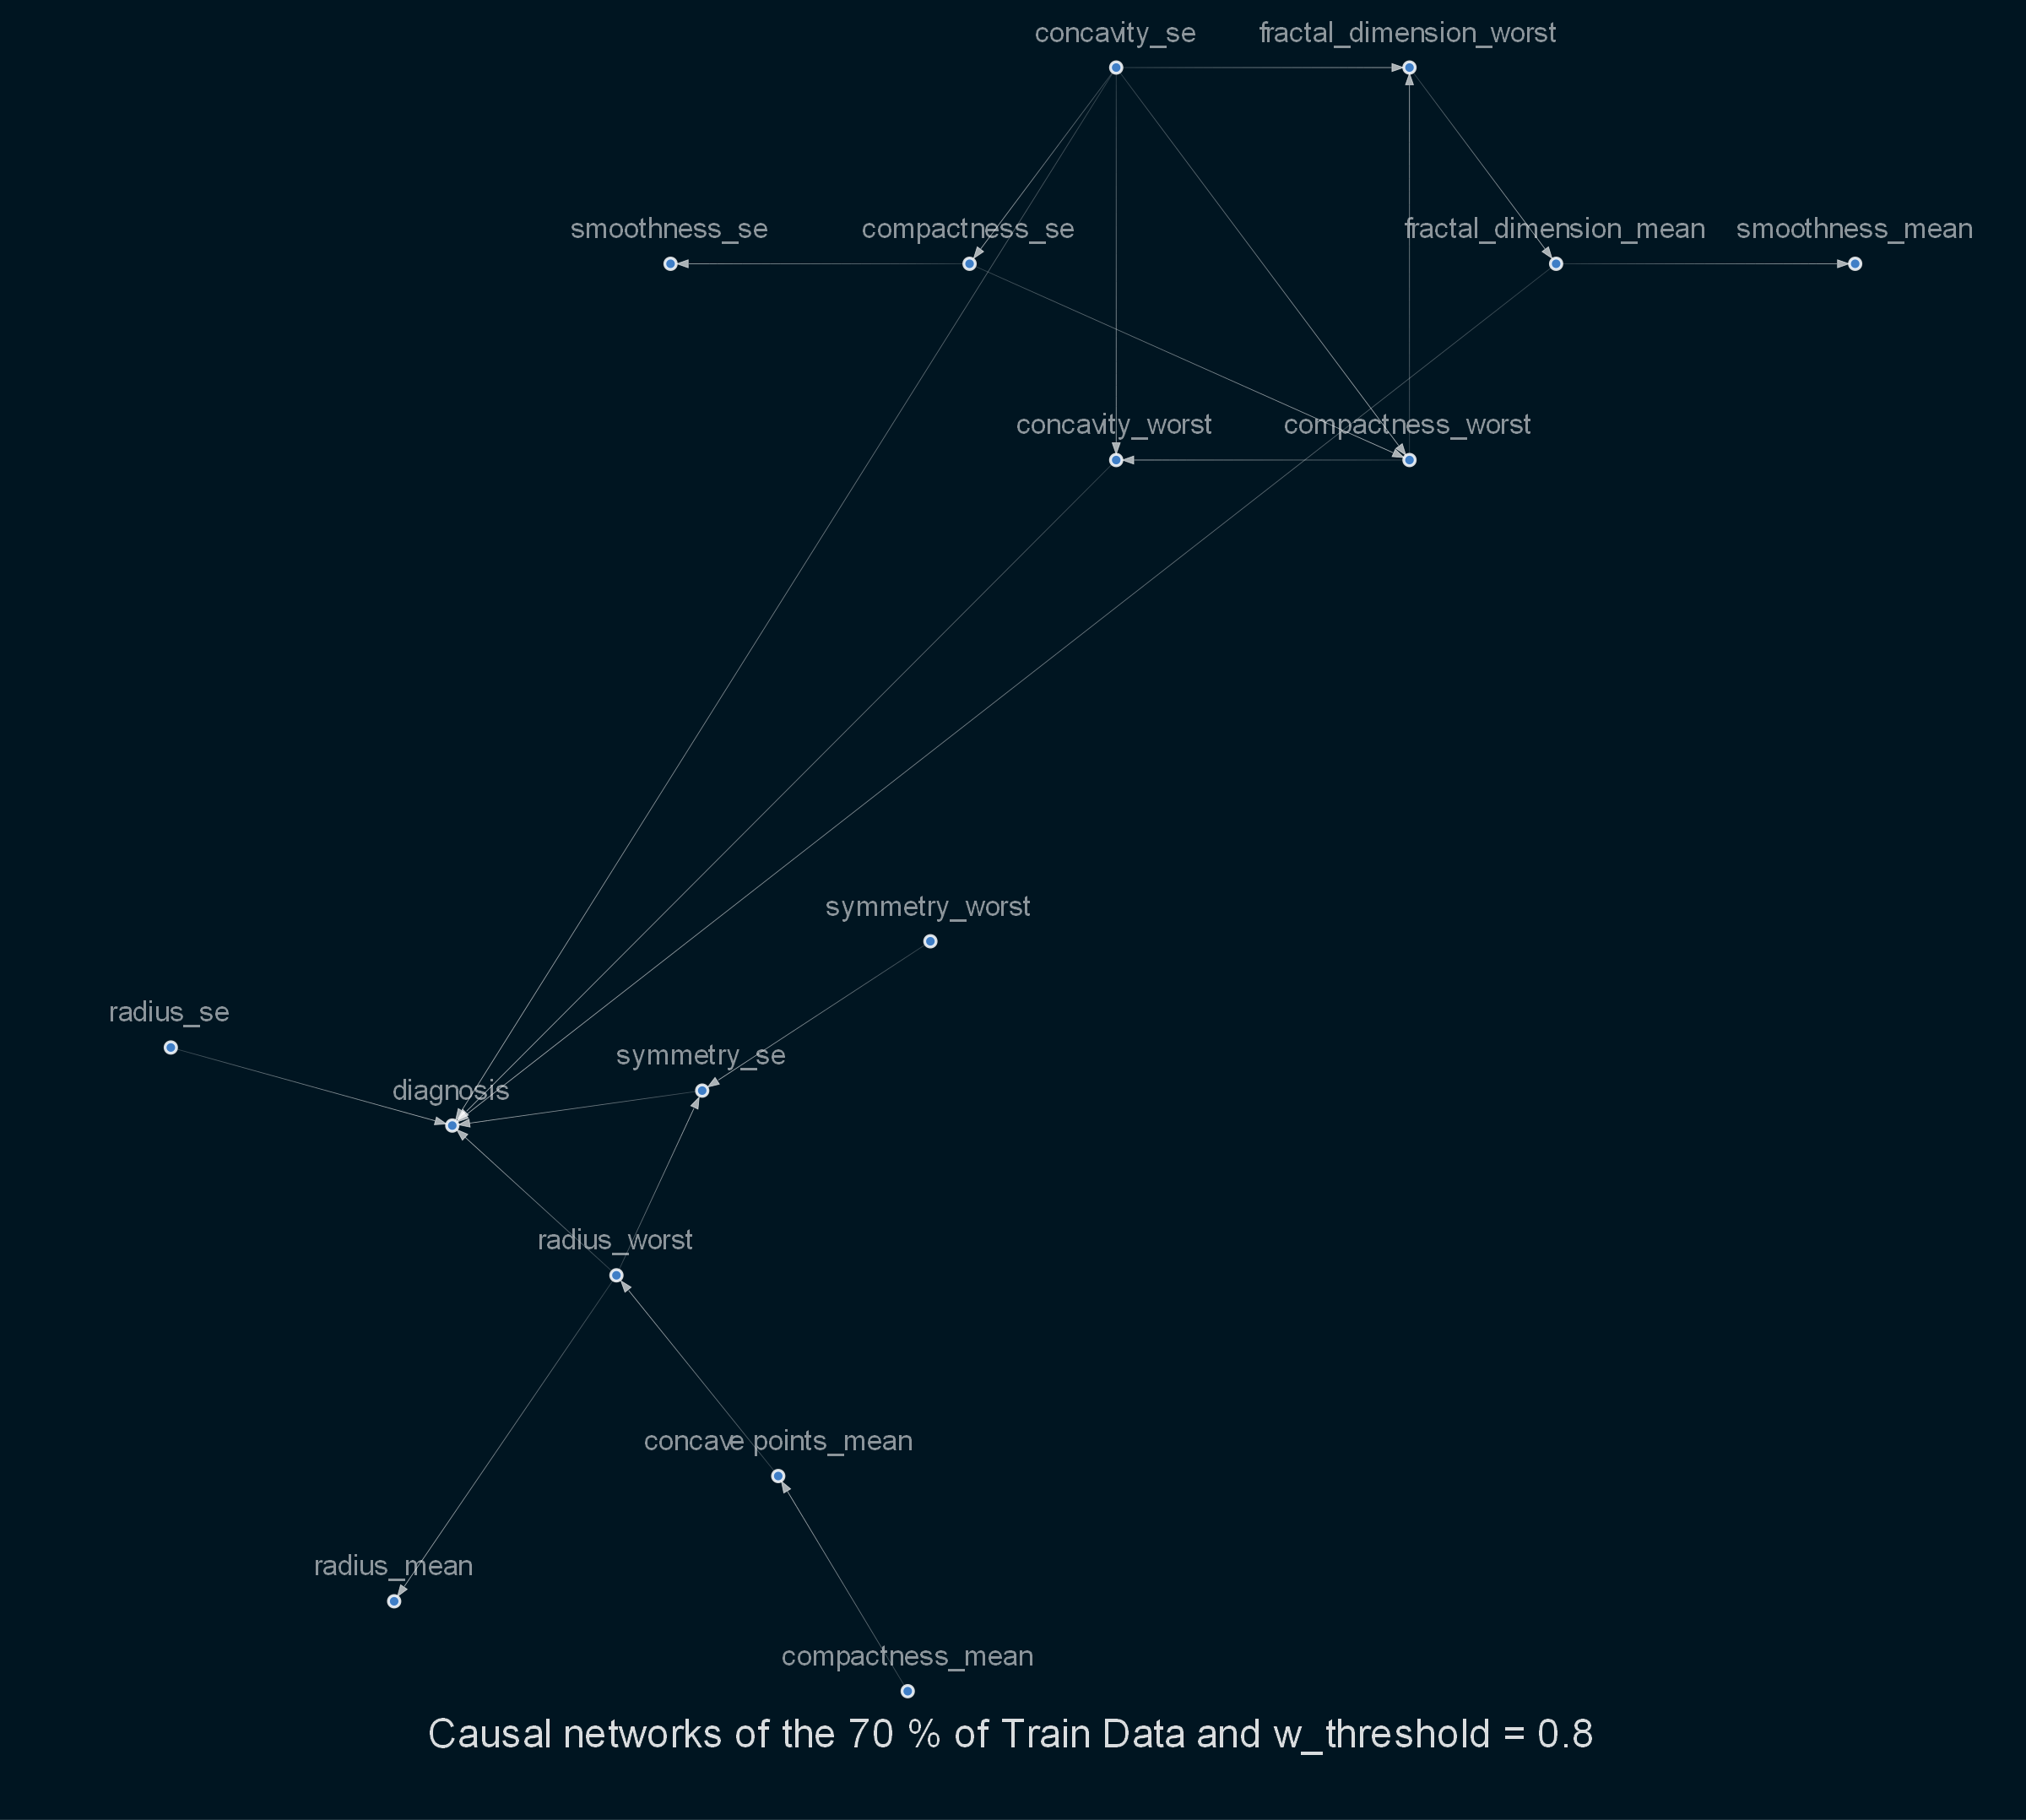

In [31]:
draw_structmodel(sm_70,'circo',label="Causal networks of the 70 % of Train Data and w_threshold = 0.8")

In [32]:
find_jaccard_index(sm_org,sm_70,"70%")

Jaccard index for ground truth and 70% of the data is 0.5


#### 80% of the Data

In [33]:
data_80=data_scaled.sample(frac=.8,random_state=42)
sm_80=from_pandas(data_80)
sm_80.remove_edges_below_threshold(0.8)
sm_80=sm_80.get_largest_subgraph()

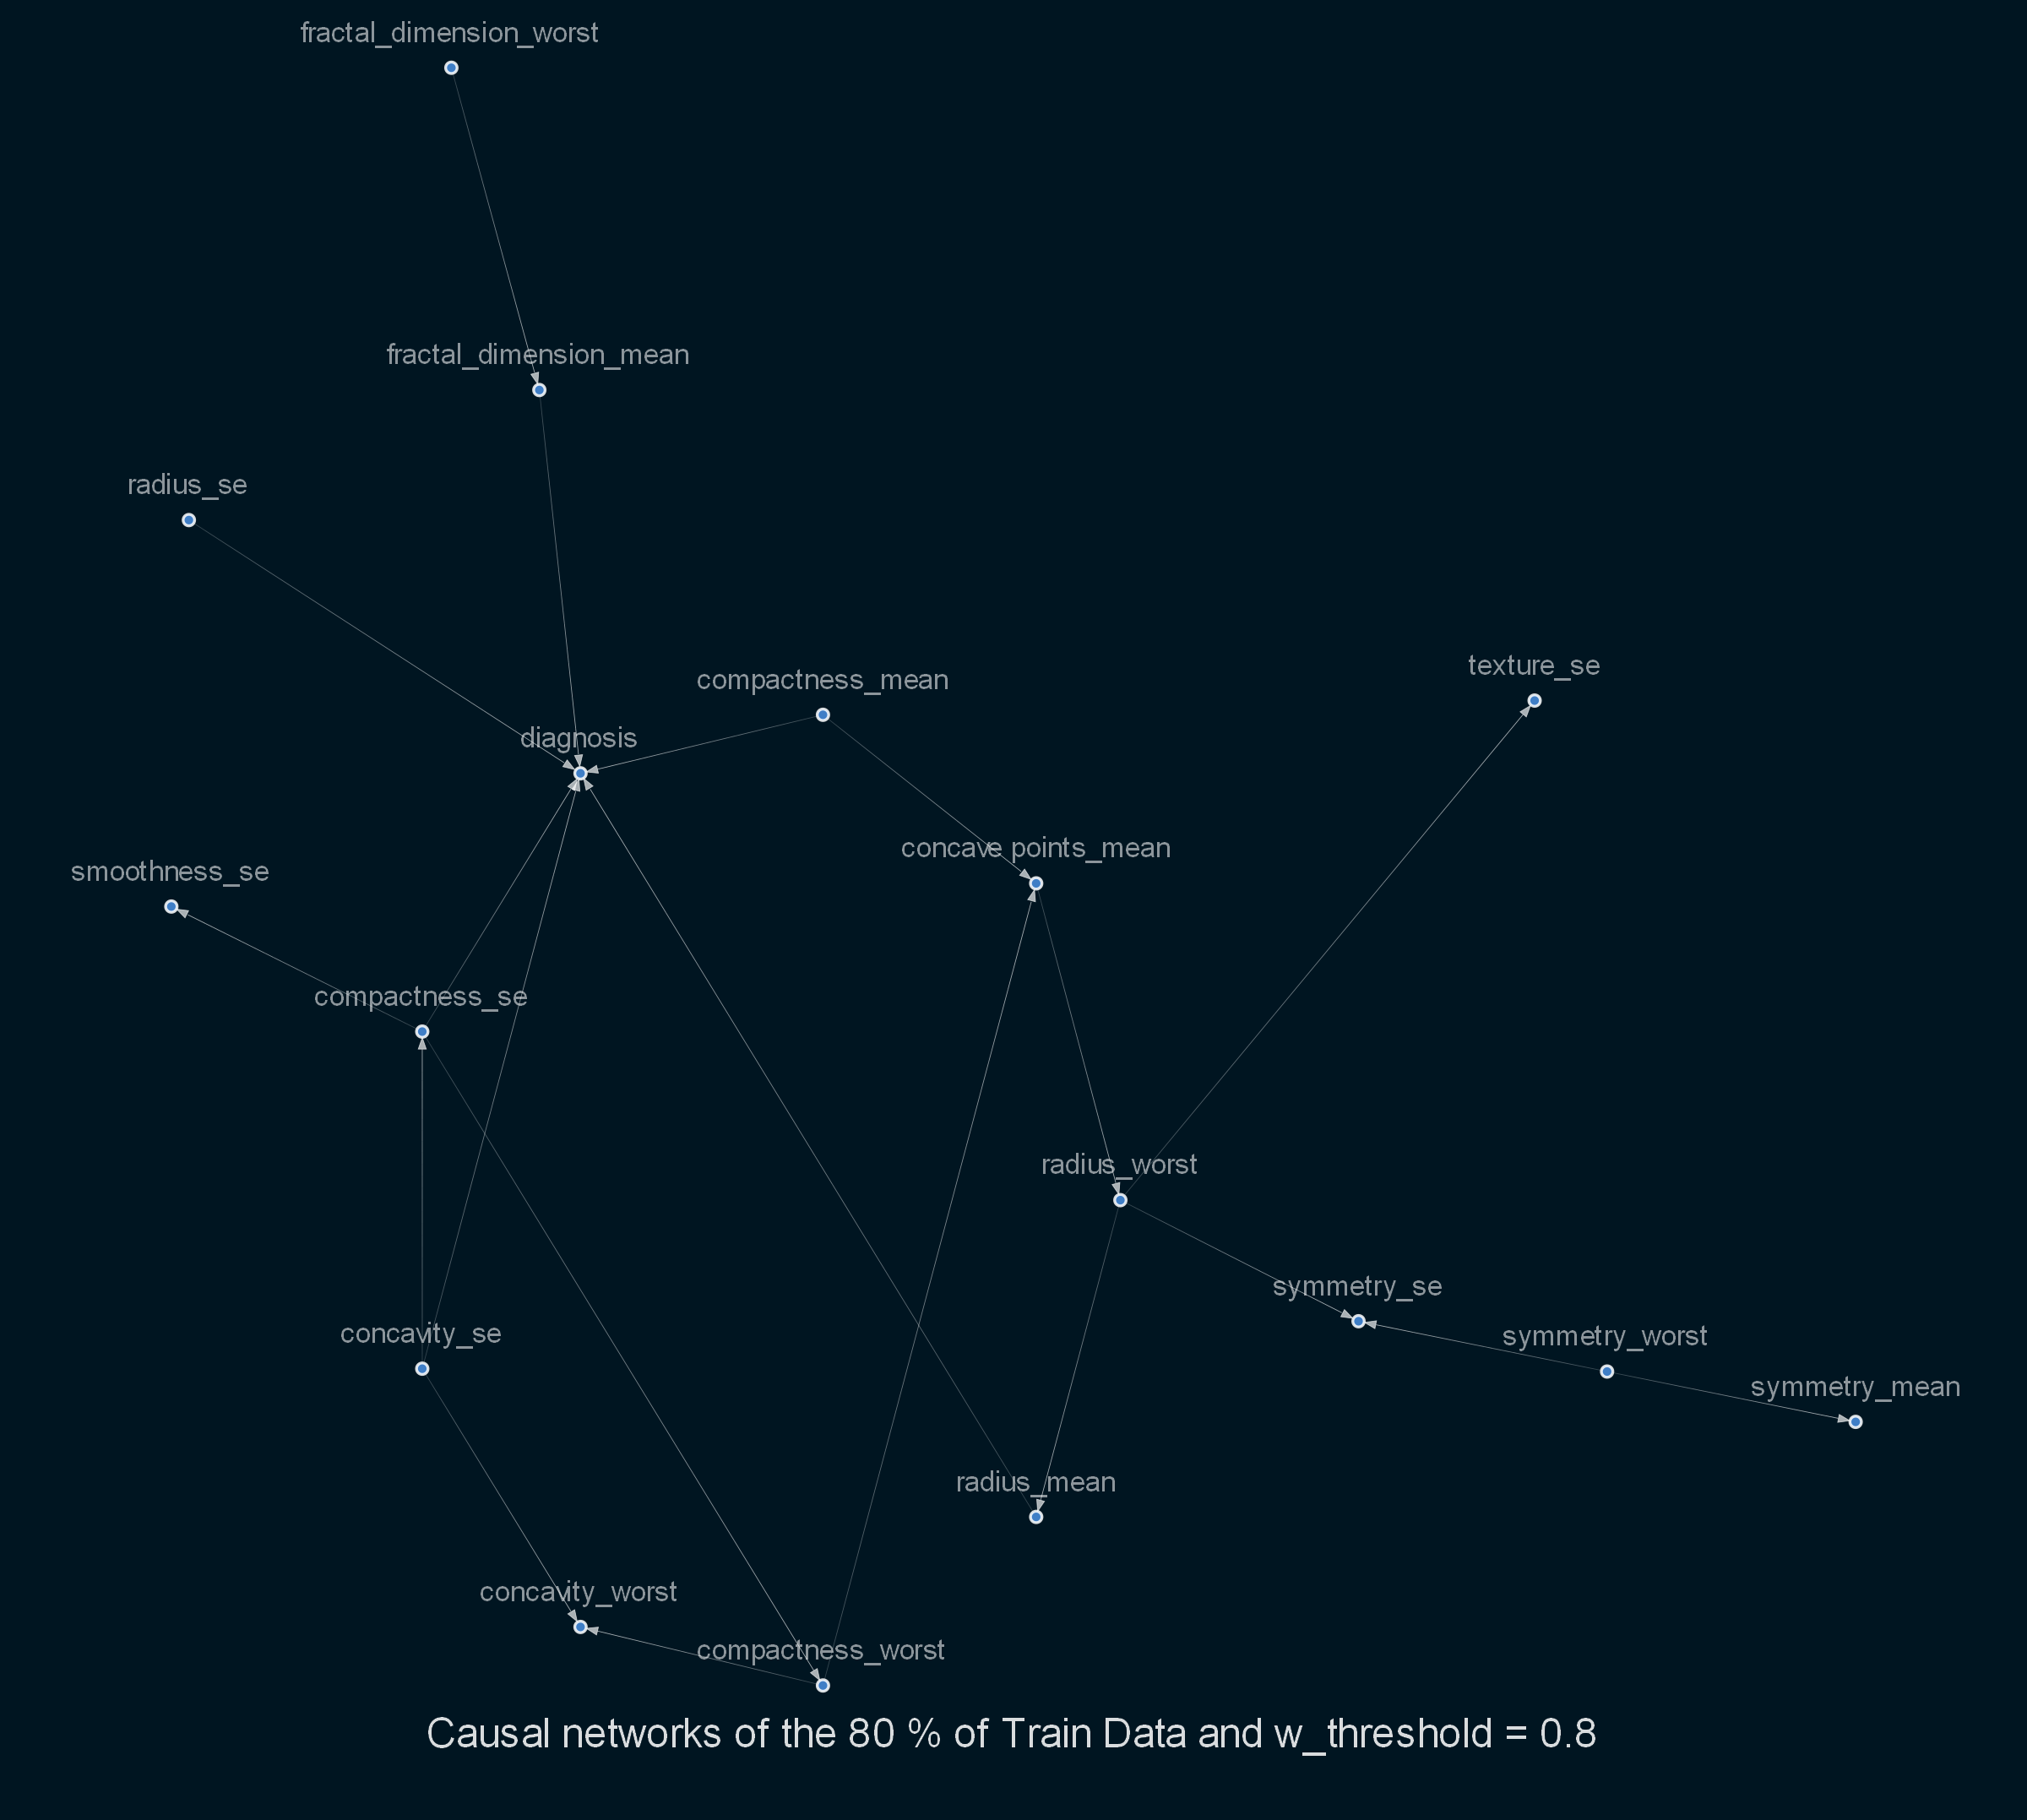

In [34]:
draw_structmodel(sm_80,'circo',label="Causal networks of the 80 % of Train Data and w_threshold = 0.8")

In [35]:
find_jaccard_index(sm_org,sm_80,"80%")

Jaccard index for ground truth and 80% of the data is 0.7272727272727273


#### 90% of the Data

In [36]:
data_90=data_scaled.sample(frac=.9,random_state=42)
sm_90=from_pandas(data_90)
sm_90.remove_edges_below_threshold(0.8)
sm_90=sm_90.get_largest_subgraph()

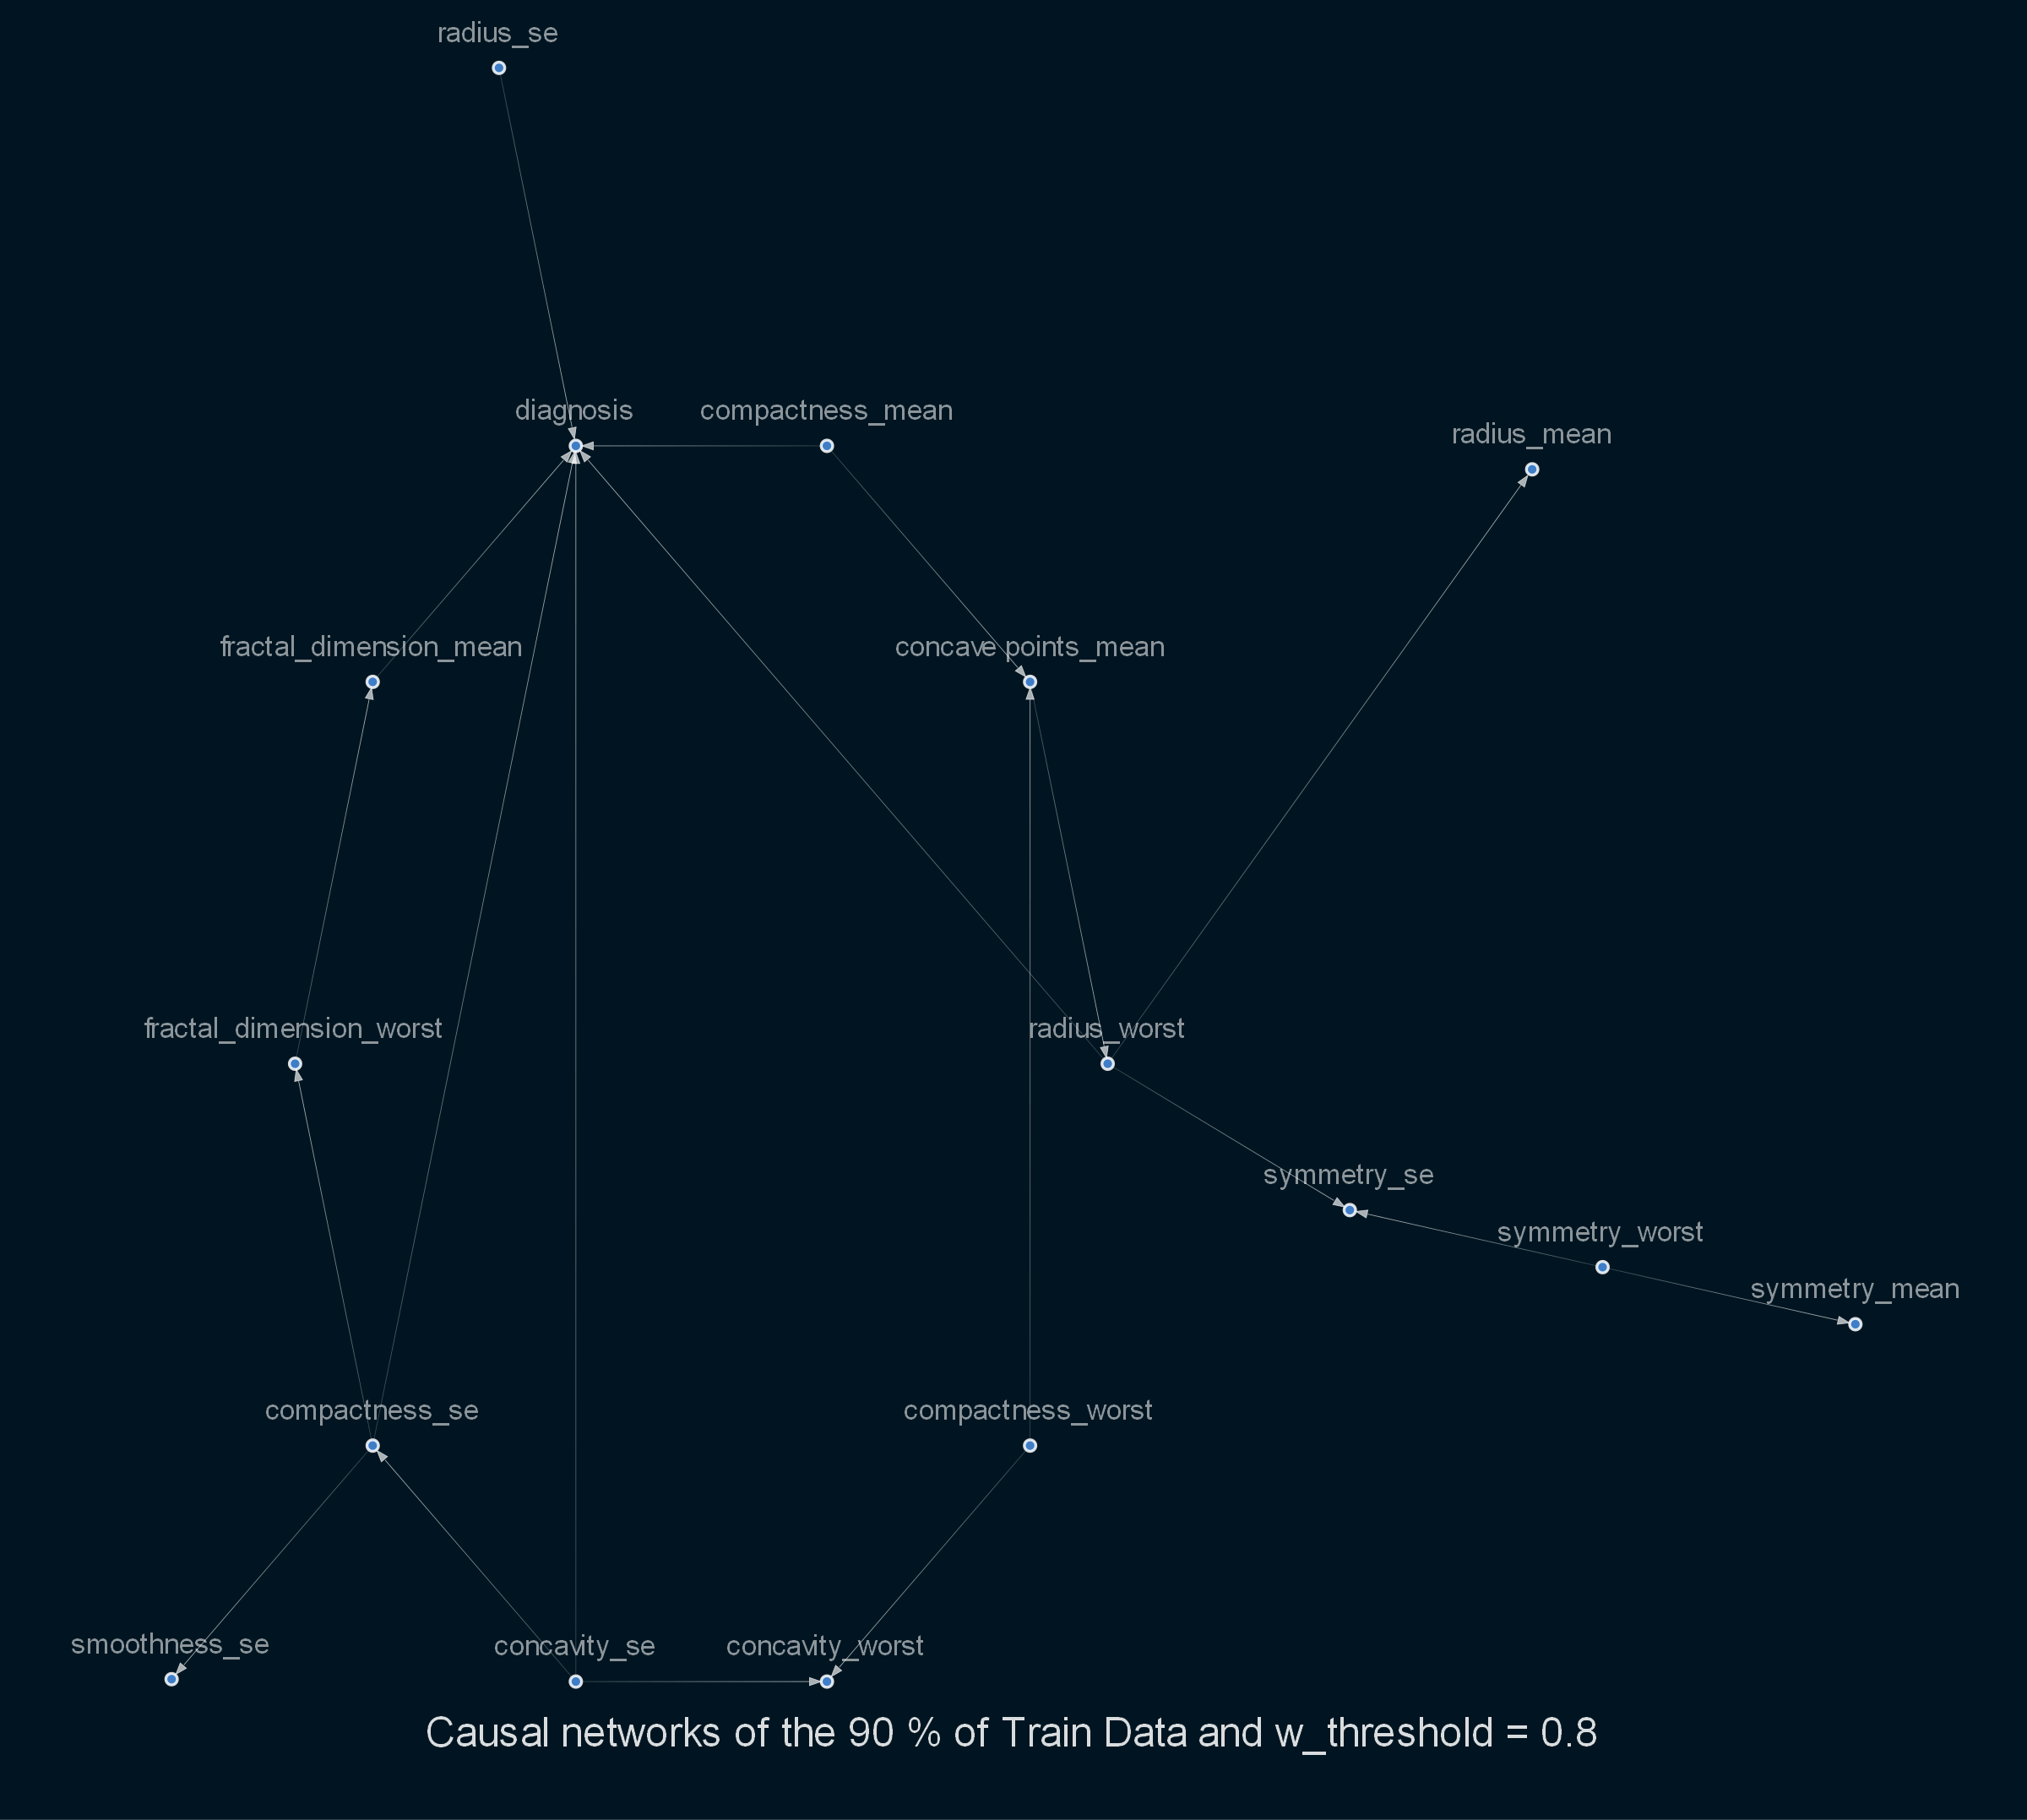

In [37]:
draw_structmodel(sm_90,'circo',label="Causal networks of the 90 % of Train Data and w_threshold = 0.8")

In [38]:
find_jaccard_index(sm_org,sm_90,"90%")

Jaccard index for ground truth and 90% of the data is 0.85


#### 95% of the Data

In [39]:
data_95=data_scaled.sample(frac=.95,random_state=42)
sm_95=from_pandas(data_95)
sm_95.remove_edges_below_threshold(0.8)
sm_95=sm_95.get_largest_subgraph()

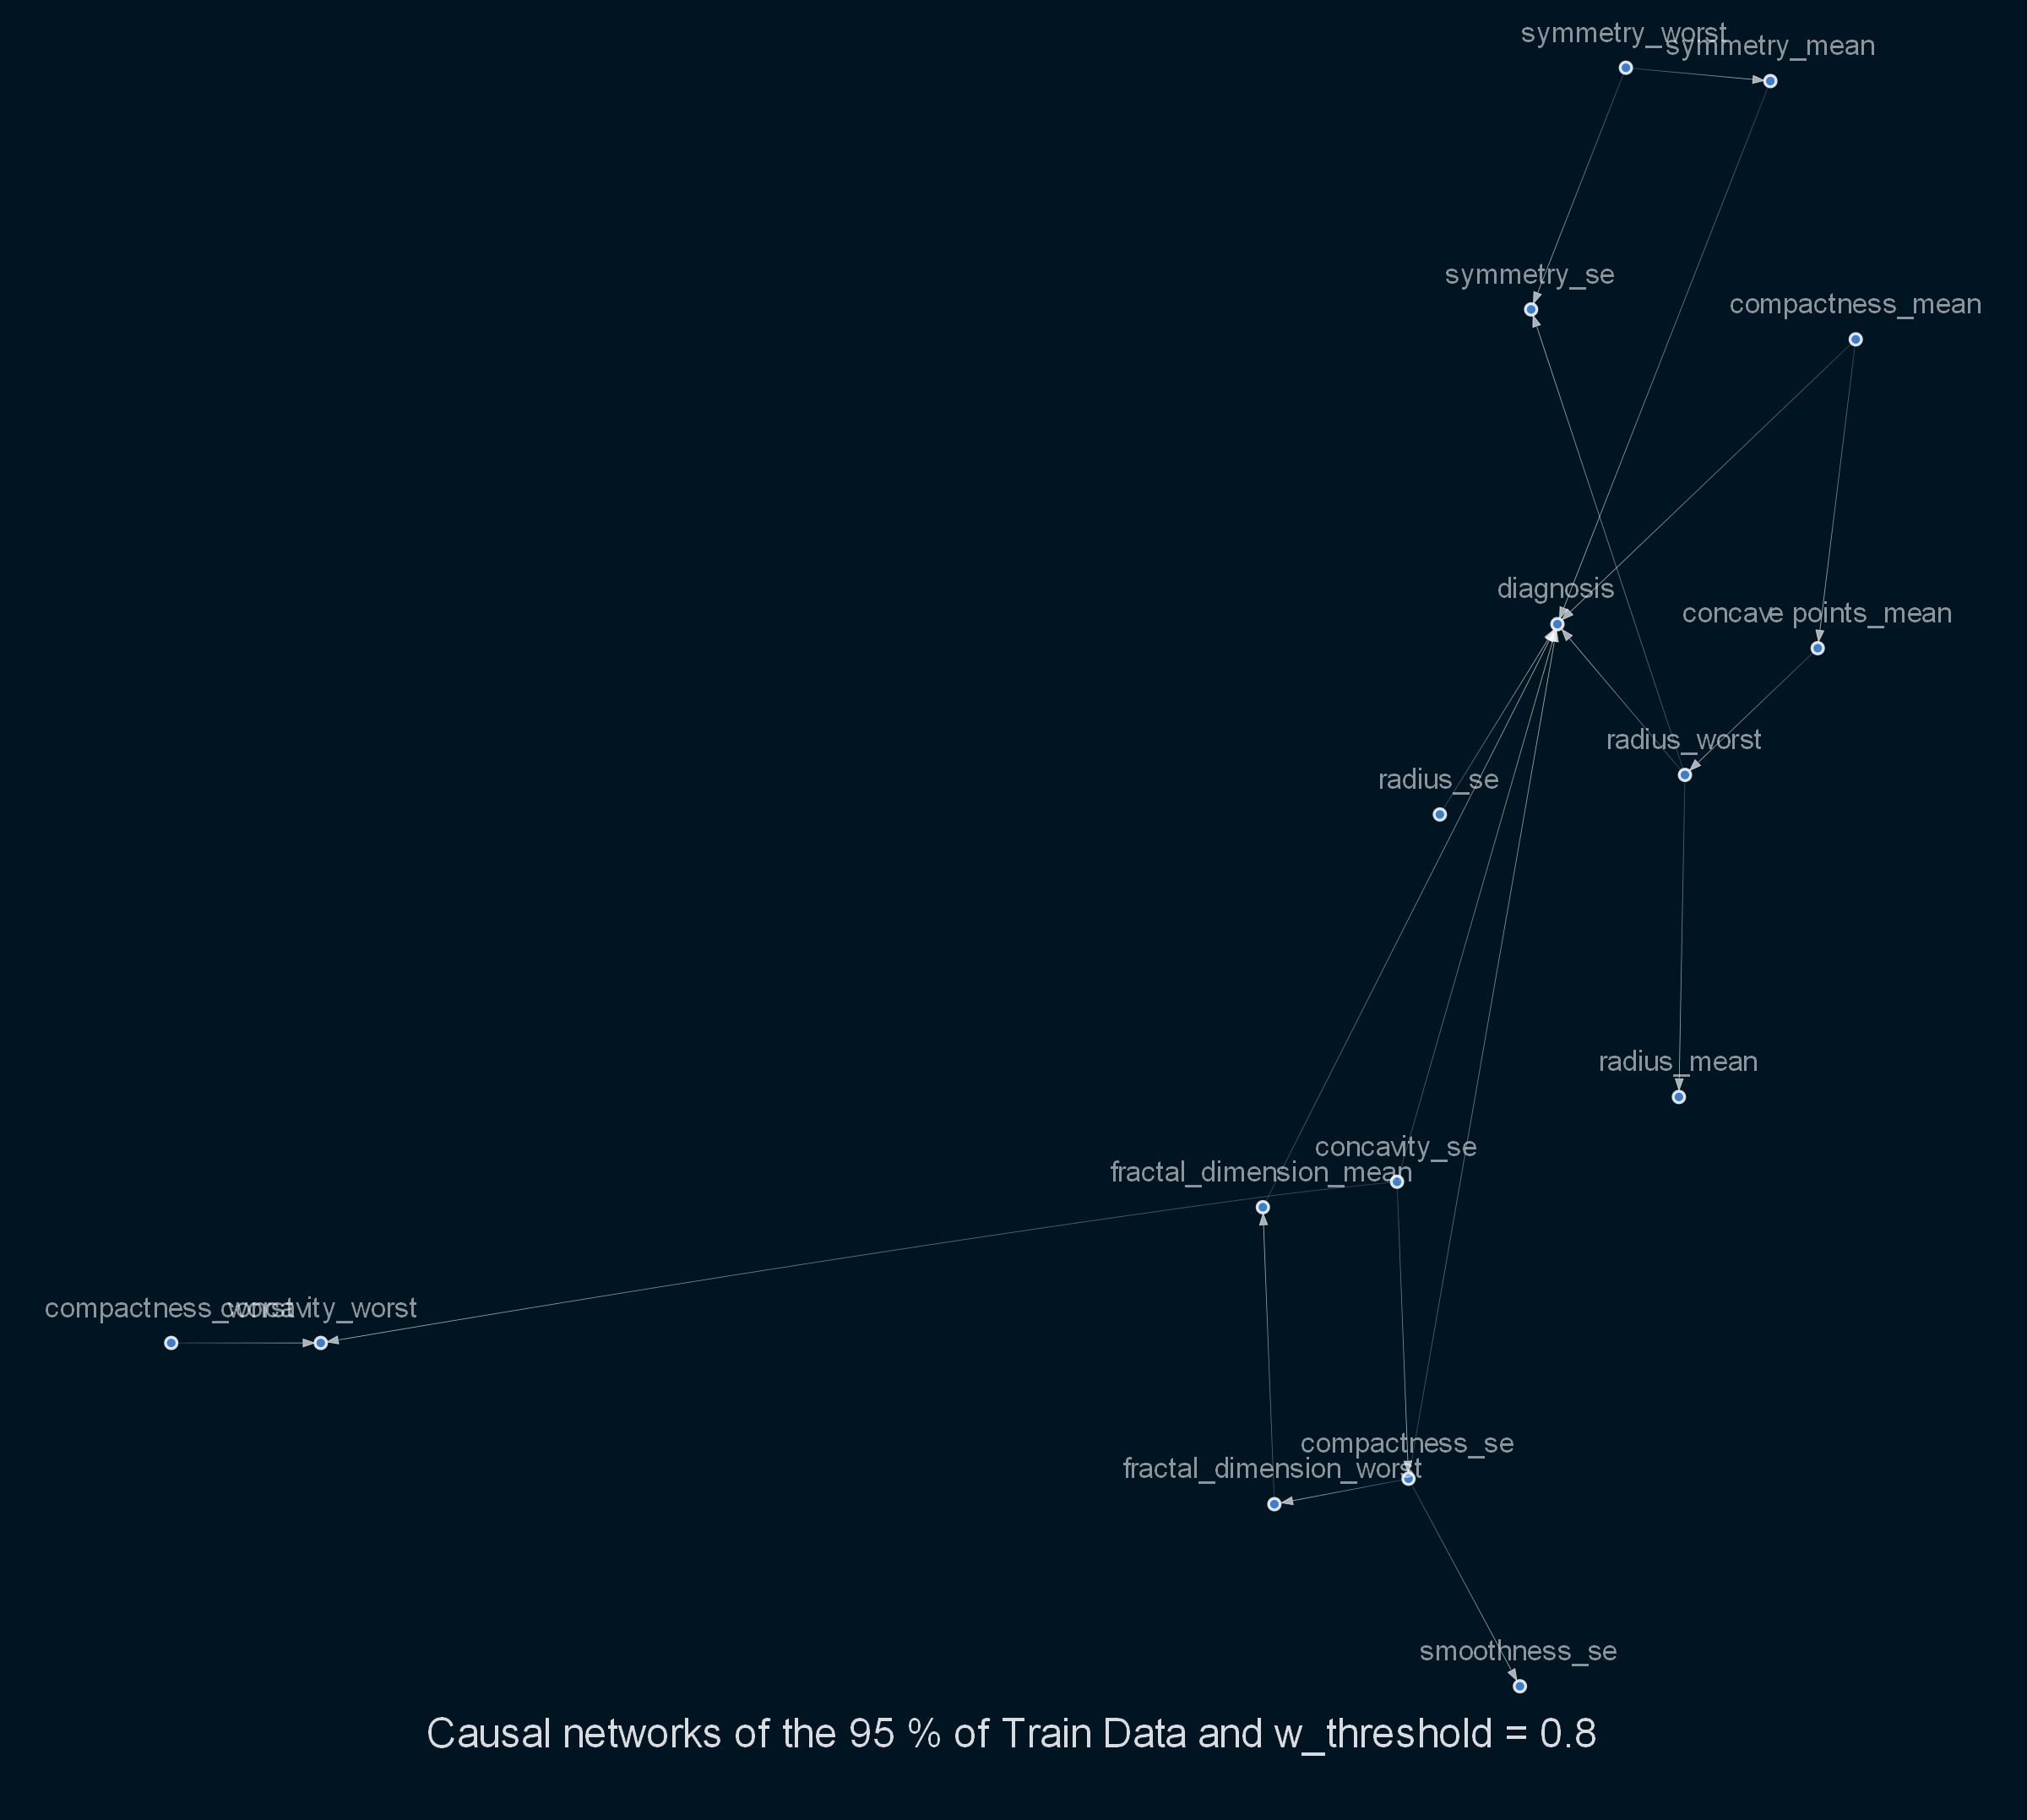

In [40]:
draw_structmodel(sm_95,'circo',label="Causal networks of the 95 % of Train Data and w_threshold = 0.8")

In [41]:
find_jaccard_index(sm_org,sm_95,"95%")

Jaccard index for ground truth and 95% of the data is 0.85


#### 100% of the Data

In [42]:
data_100=data_scaled.sample(frac=1,random_state=42)

In [43]:
sm_100=from_pandas(data_100,tabu_parent_nodes=['diagnosis'])

In [44]:
sm_100.remove_edges_below_threshold(0.8)

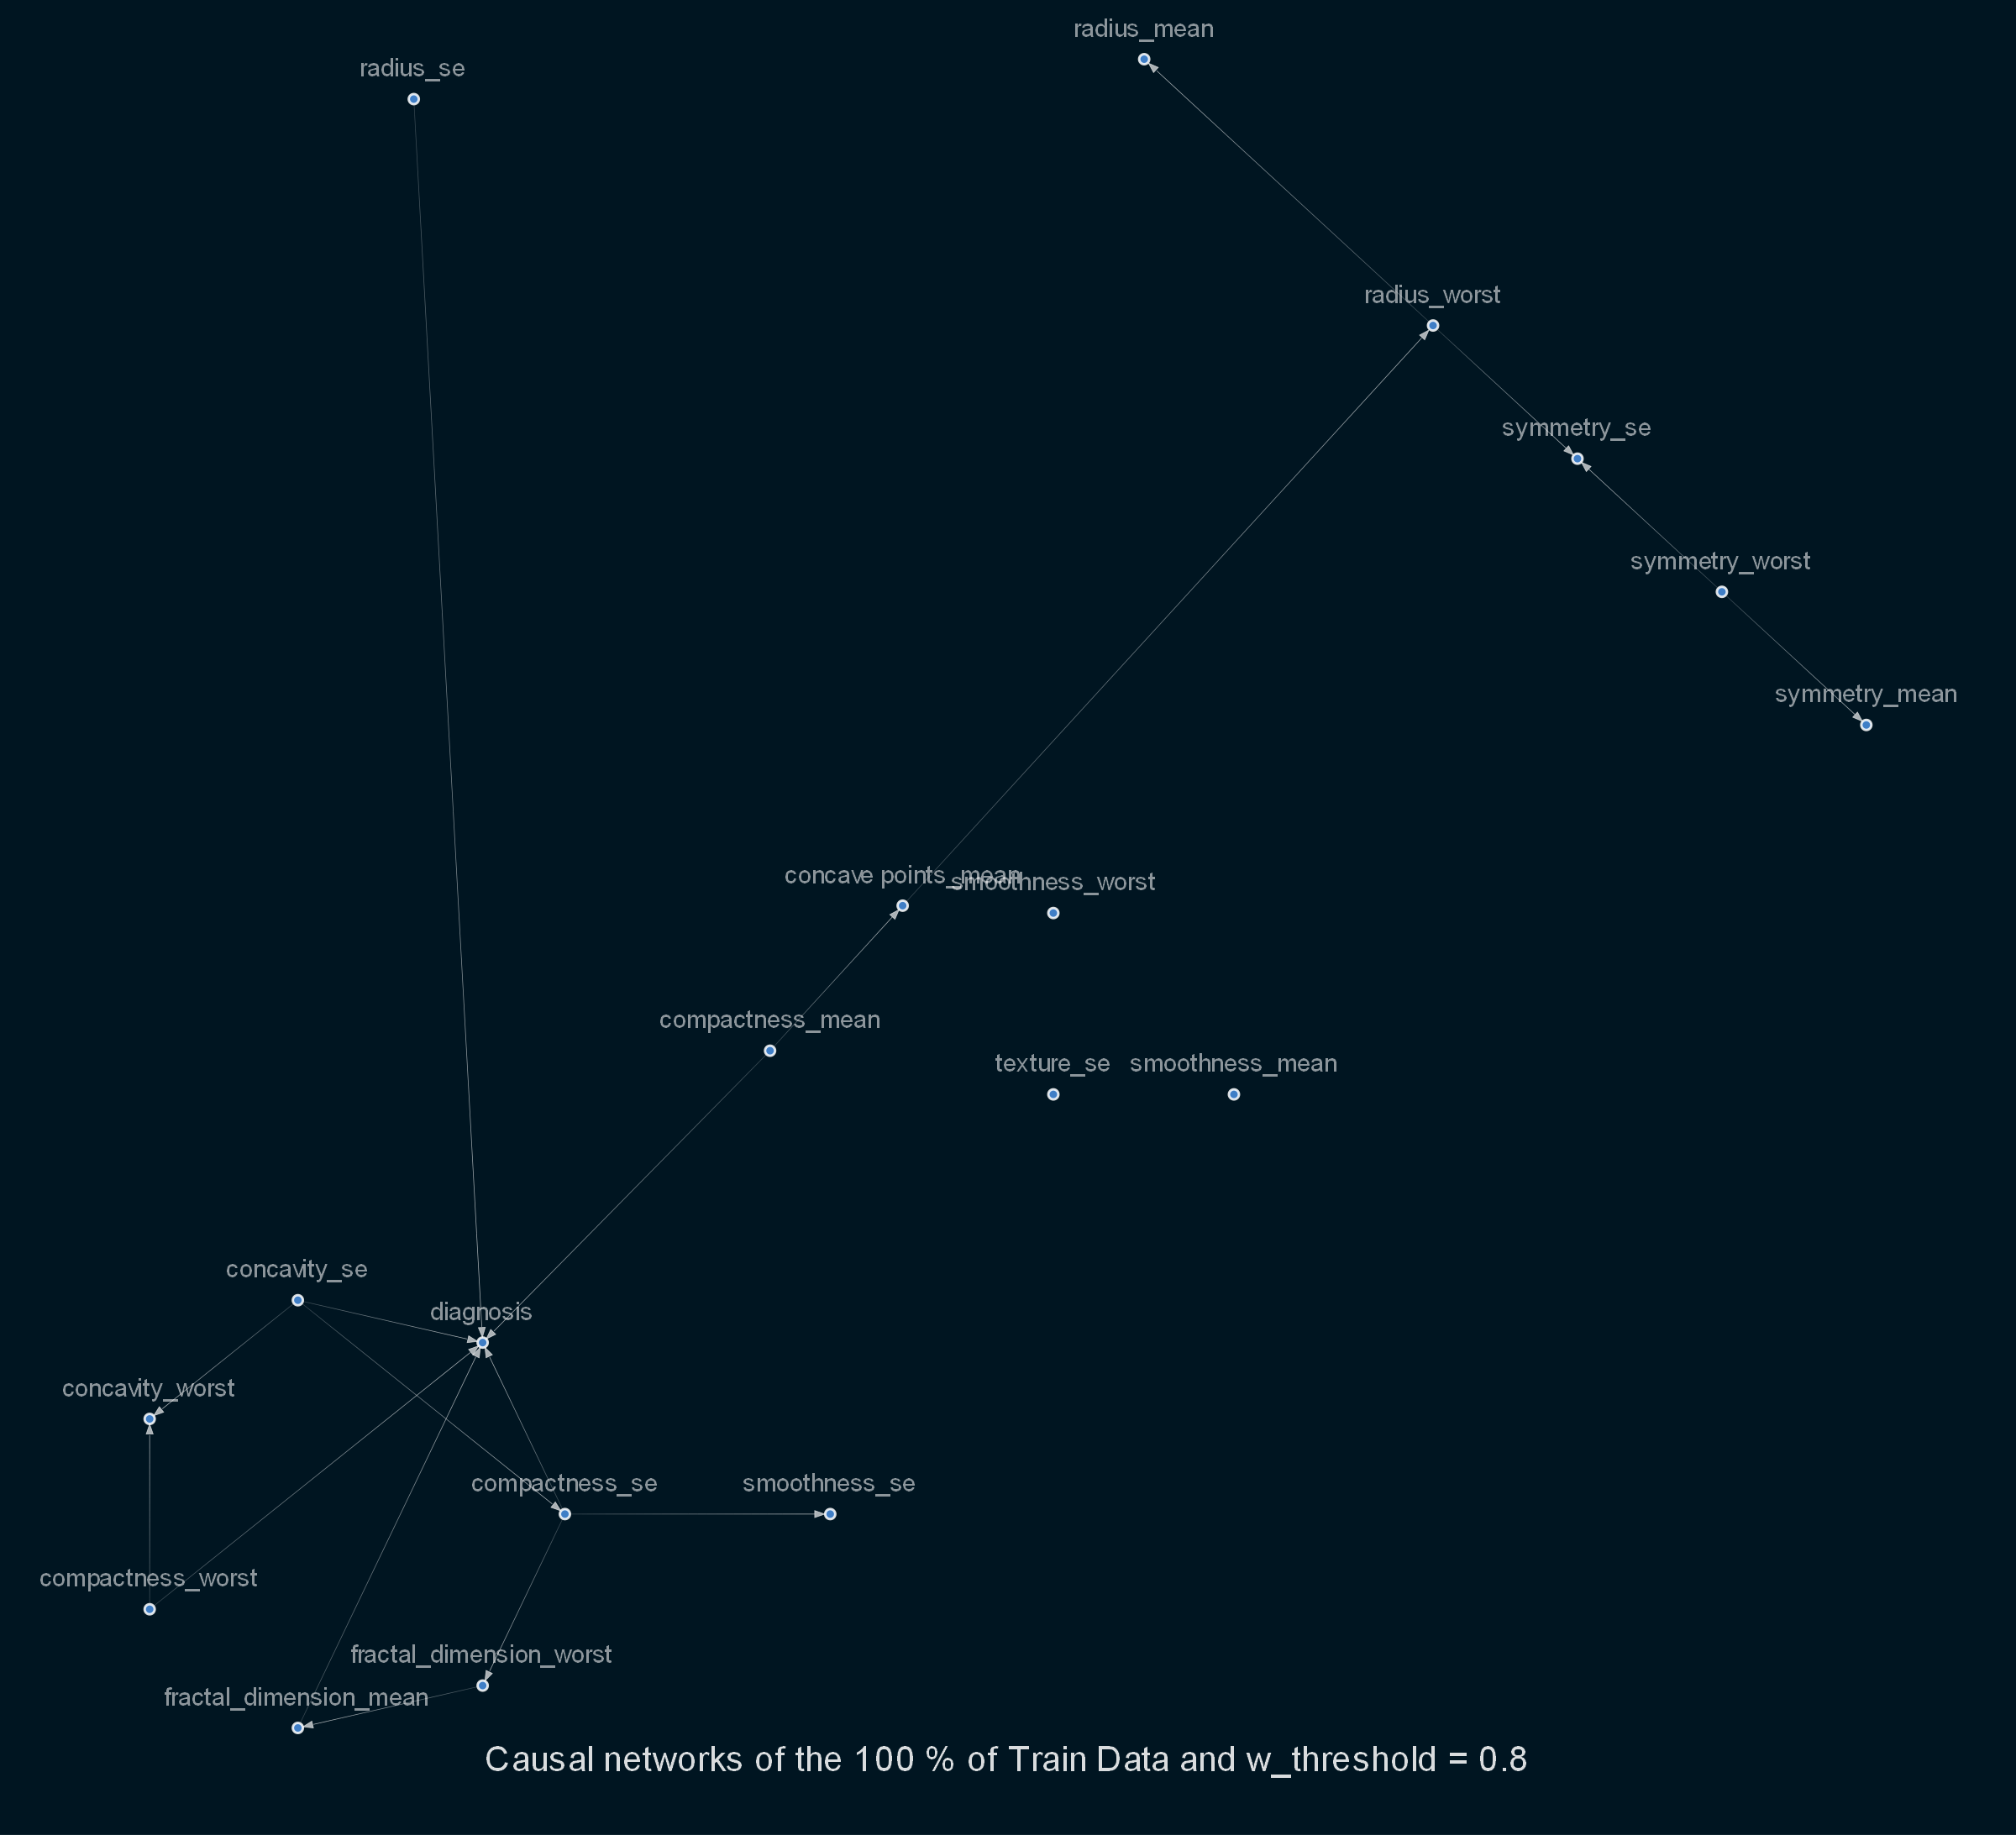

In [45]:
draw_structmodel(sm_100,'circo',label="Causal networks of the 100 % of Train Data and w_threshold = 0.8")

In [46]:
find_jaccard_index(sm_org,sm_100,"100%")

Jaccard index for ground truth and 100% of the data is 1.0


### Variables that point directly to the target variable

In [47]:
nodes_name=dict(dict(sm_100.edges).keys())

In [48]:
direct_cols=[x for x,v in nodes_name.items() if v == 'diagnosis']

In [49]:
direct_cols

['compactness_worst',
 'compactness_mean',
 'compactness_se',
 'concavity_se',
 'radius_se',
 'fractal_dimension_mean']

### Bayesian Network

Due to memory constraint, I will use a few features

In [114]:
data_new=data_scaled[direct_cols+['diagnosis']]

In [115]:
sm_new=from_pandas(data_new)
sm_new.remove_edges_below_threshold(0.8)
sm_new=sm_new.get_largest_subgraph()

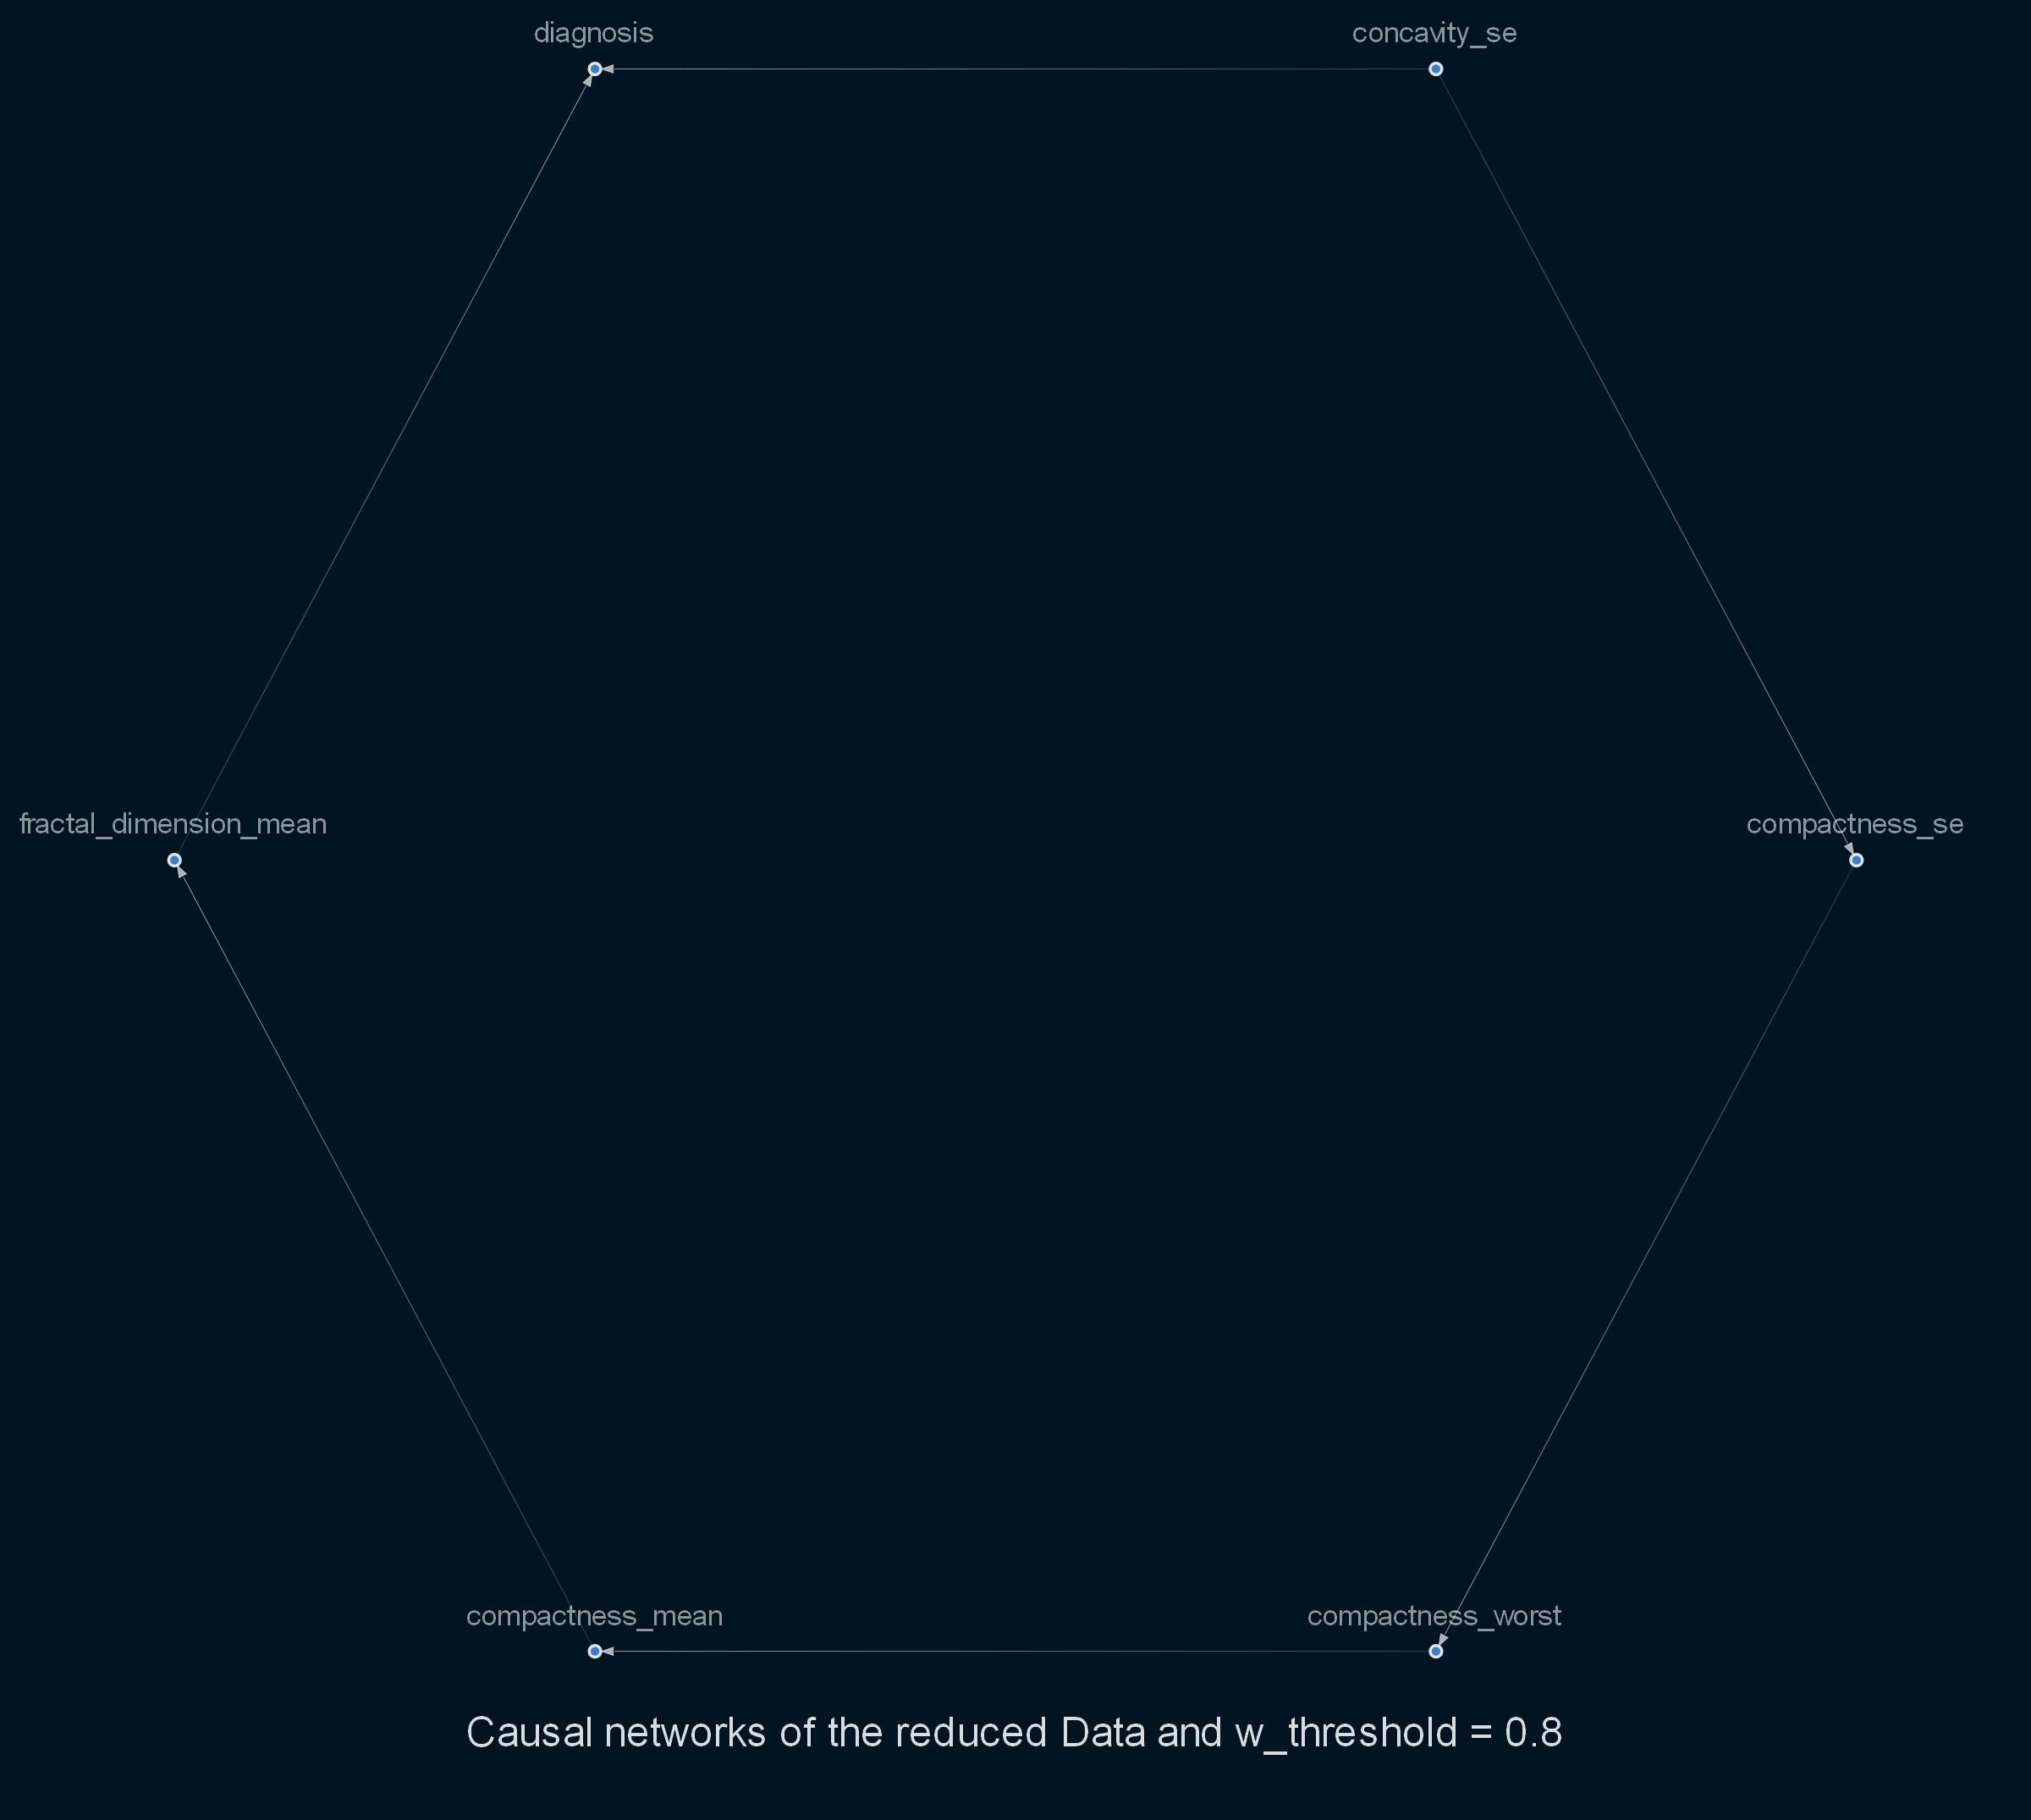

In [116]:
draw_structmodel(sm_new,'circo',label="Causal networks of the reduced Data and w_threshold = 0.8")

In [126]:
from causalnex.network import BayesianNetwork
from causalnex.discretiser import Discretiser
from causalnex.evaluation import classification_report

In [118]:
# bn = BayesianNetwork(sm_100)
bn = BayesianNetwork(sm_new)

In [119]:
discret_data=data_new.copy()

In [120]:
train,test = train_test_split(discret_data,train_size=0.8,test_size = 0.2,random_state = 42)

#### Fit Conditional Probability Distributions
The fit_cpds method of BayesianNetwork accepts a dataset to learn the conditional probablilty distributions (CPDs) 
of each node, along with a method of how to do this fit.

In [121]:
bn = bn.fit_node_states(discret_data)

In [122]:
bn=bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [123]:
discret_data.loc[147, discret_data.columns != 'diagnosis']

compactness_worst         0.241019
compactness_mean          0.333265
compactness_se            0.349371
concavity_se              0.133914
radius_se                 0.112439
fractal_dimension_mean    0.315291
Name: 147, dtype: float64

In [124]:
predictions = bn.predict(test, "diagnosis")

In [125]:
print(f"The prediction is '{predictions.loc[147, 'diagnosis_prediction']}'")
print(f"The ground truth is '{discret_data.loc[147, 'diagnosis']}'")

The prediction is '0.0'
The ground truth is '0.0'


### Classification Summary

In [127]:
classification_report(bn, test, "diagnosis")

{'diagnosis_0.0': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 28},
 'diagnosis_1.0': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 28},
 'accuracy': 0.5,
 'macro avg': {'precision': 0.25,
  'recall': 0.5,
  'f1-score': 0.3333333333333333,
  'support': 56},
 'weighted avg': {'precision': 0.25,
  'recall': 0.5,
  'f1-score': 0.3333333333333333,
  'support': 56}}